<a href="https://colab.research.google.com/github/HAZZANAyatullah/HAZZANAyatullah/blob/main/Zindi_heart_dis__Prediction_hackhaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample_sub = pd.read_csv("Sample_Submission.csv")
var_Def = pd.read_csv("Variable_Definitions.csv")

In [3]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [5]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [6]:


print(var_Def)


                                  Variable defination
0                                                 age
1                                                 sex
2                          chest pain type (4 values)
3                              resting blood pressure
4                          serum cholestoral in mg/dl
5                     fasting blood sugar > 120 mg/dl
6   resting electrocardiographic results (values 0...
7                         maximum heart rate achieved
8                             exercise induced angina
9   oldpeak = ST depression induced by exercise re...
10          the slope of the peak exercise ST segment
11  number of major vessels (0-3) colored by flour...
12  thal: 0 = normal; 1 = fixed defect; 2 = revers...


Exploratory Data Analysis (EDA)

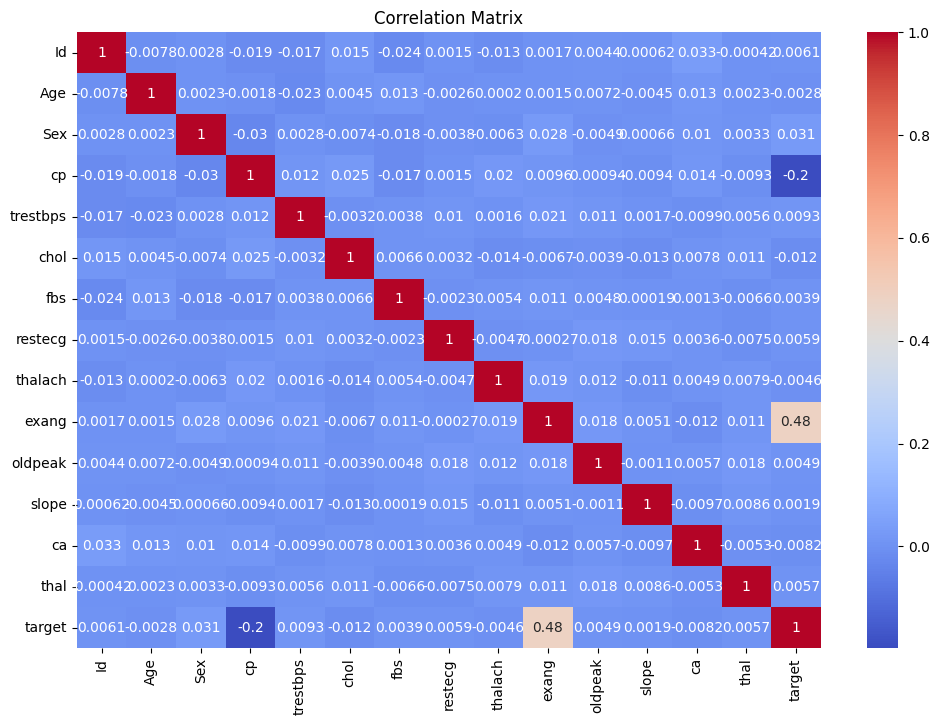

In [7]:
correlation = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

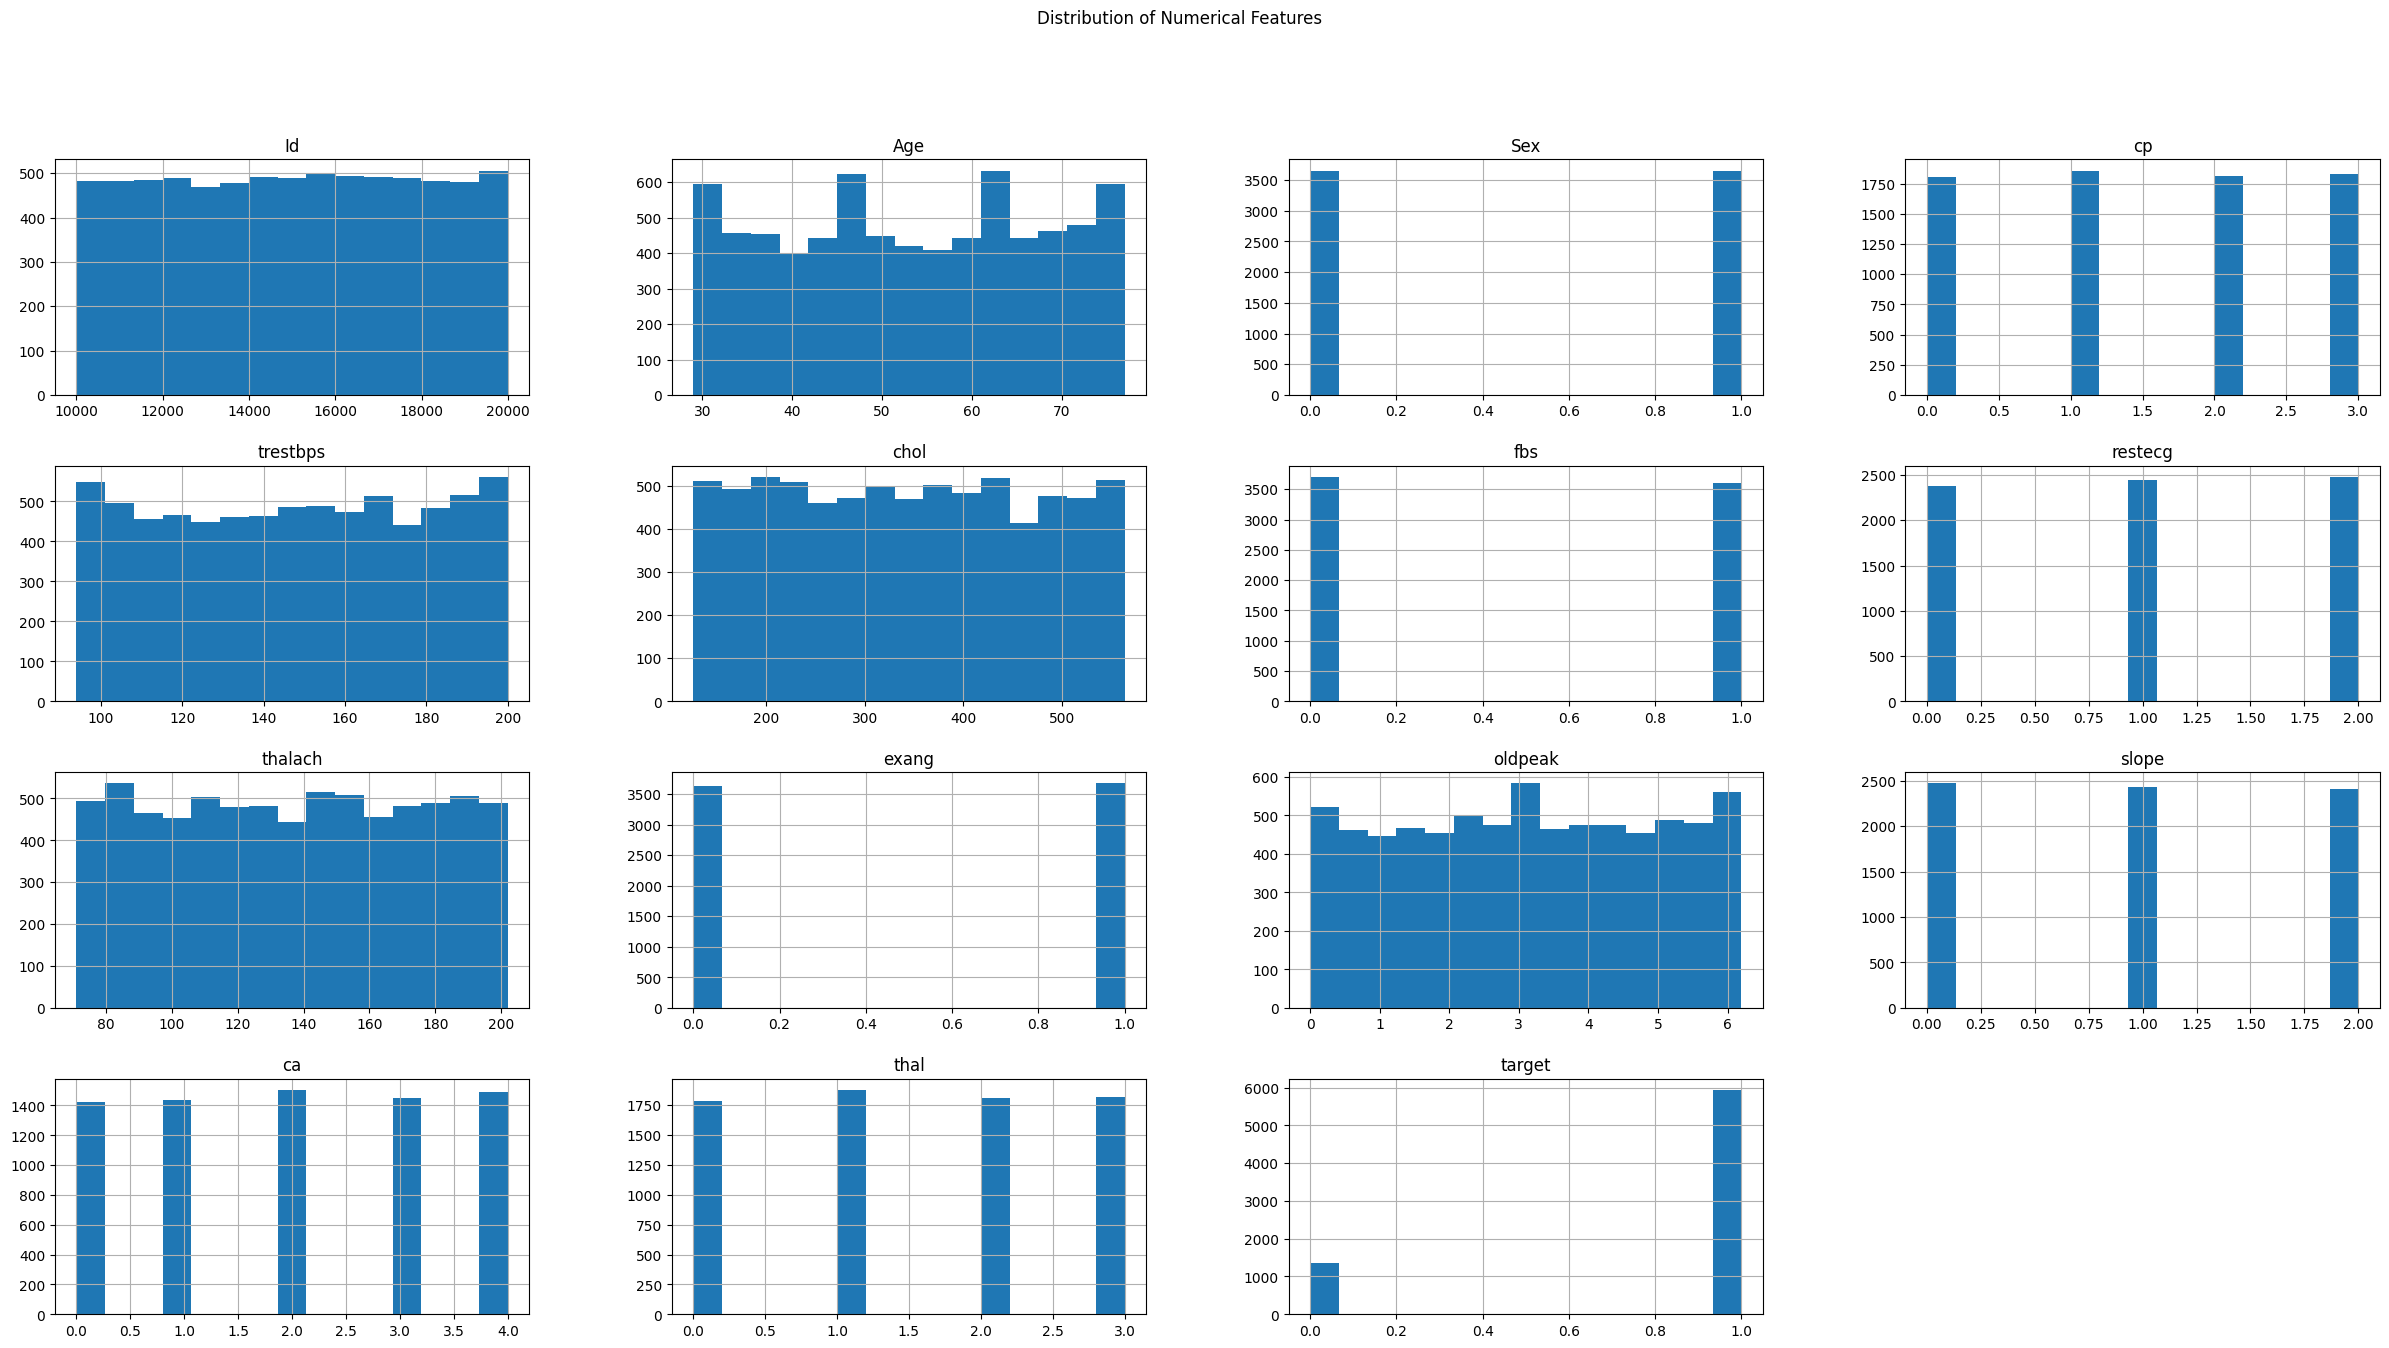

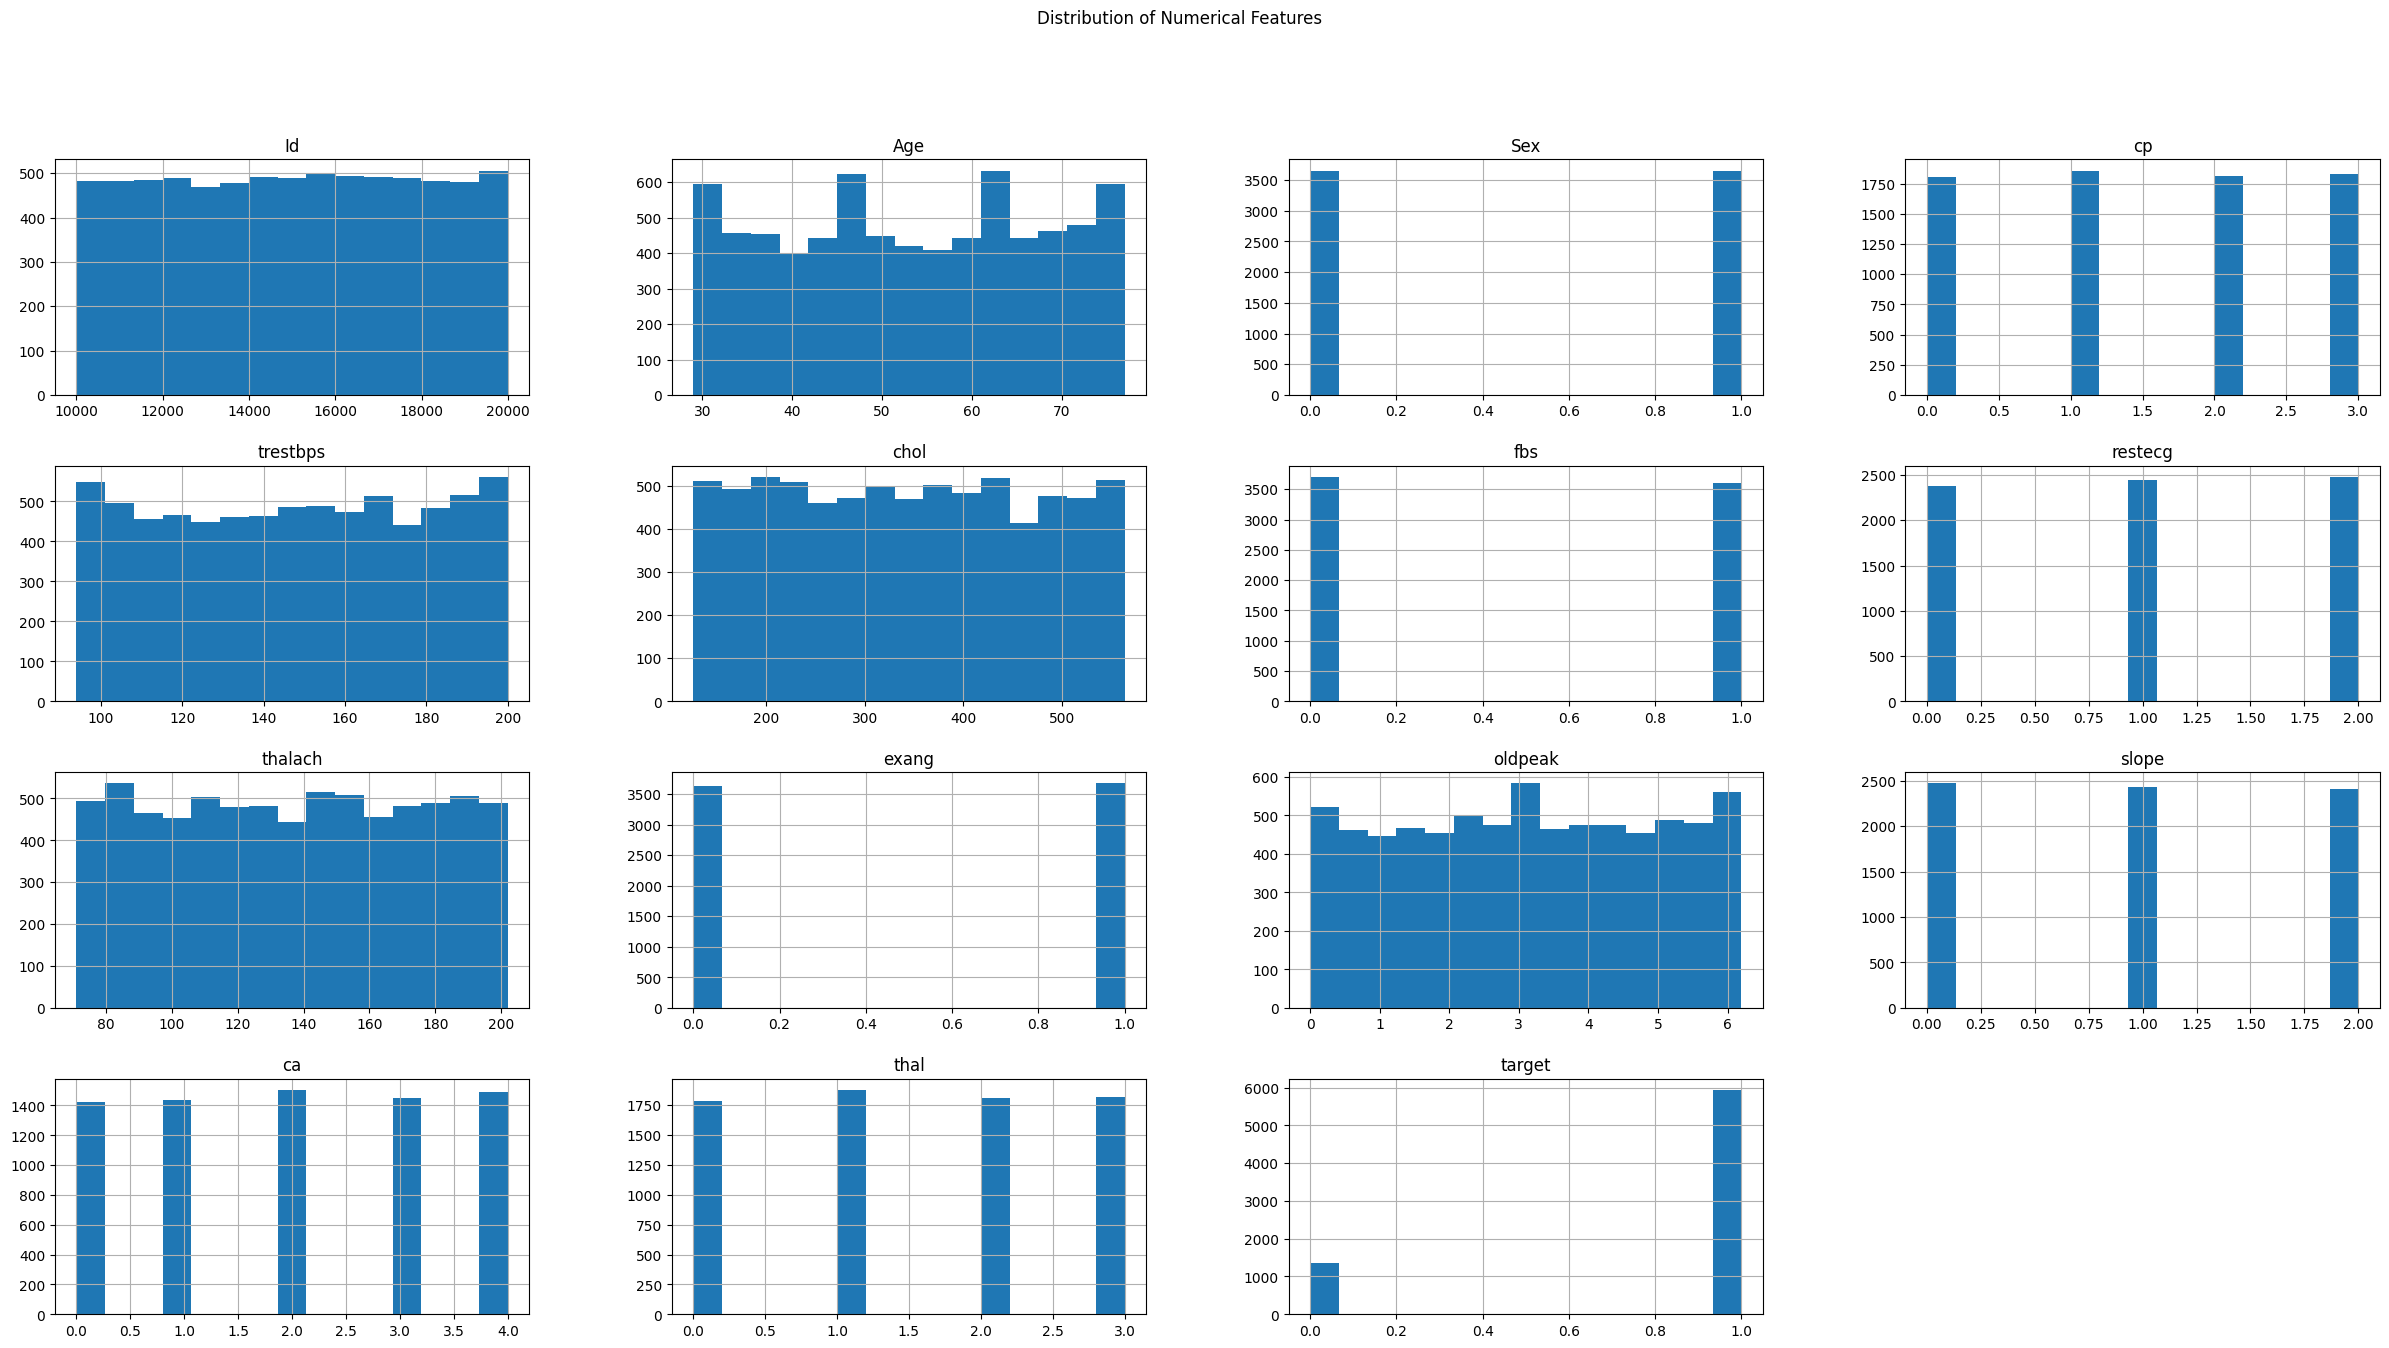

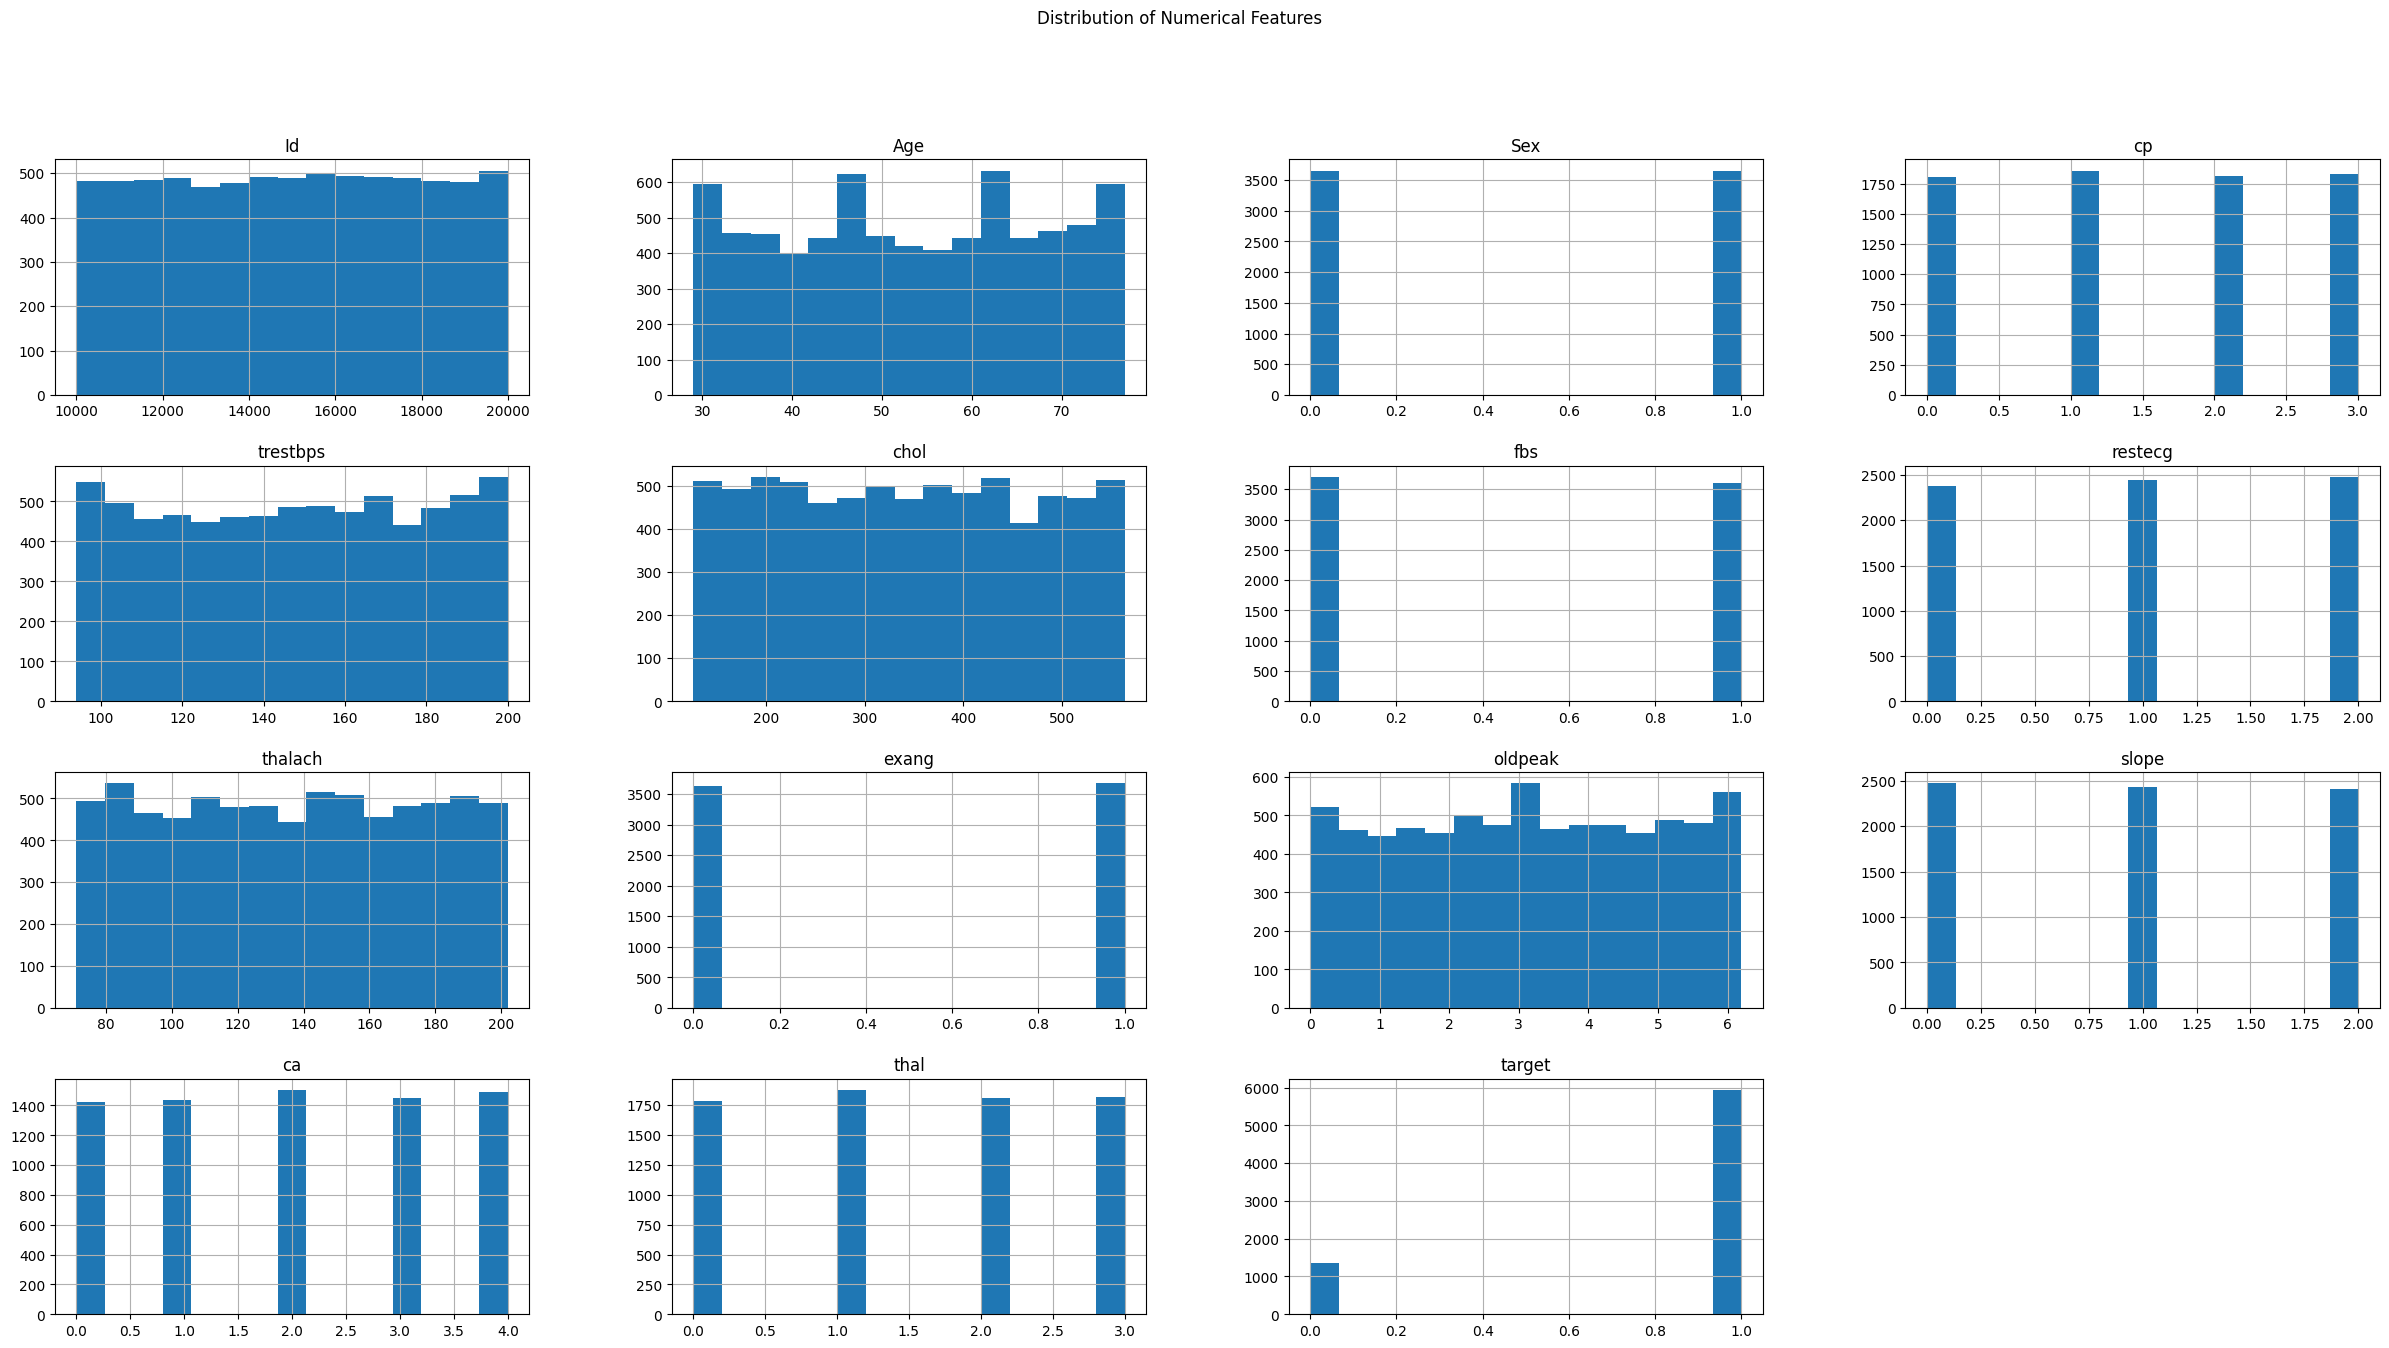

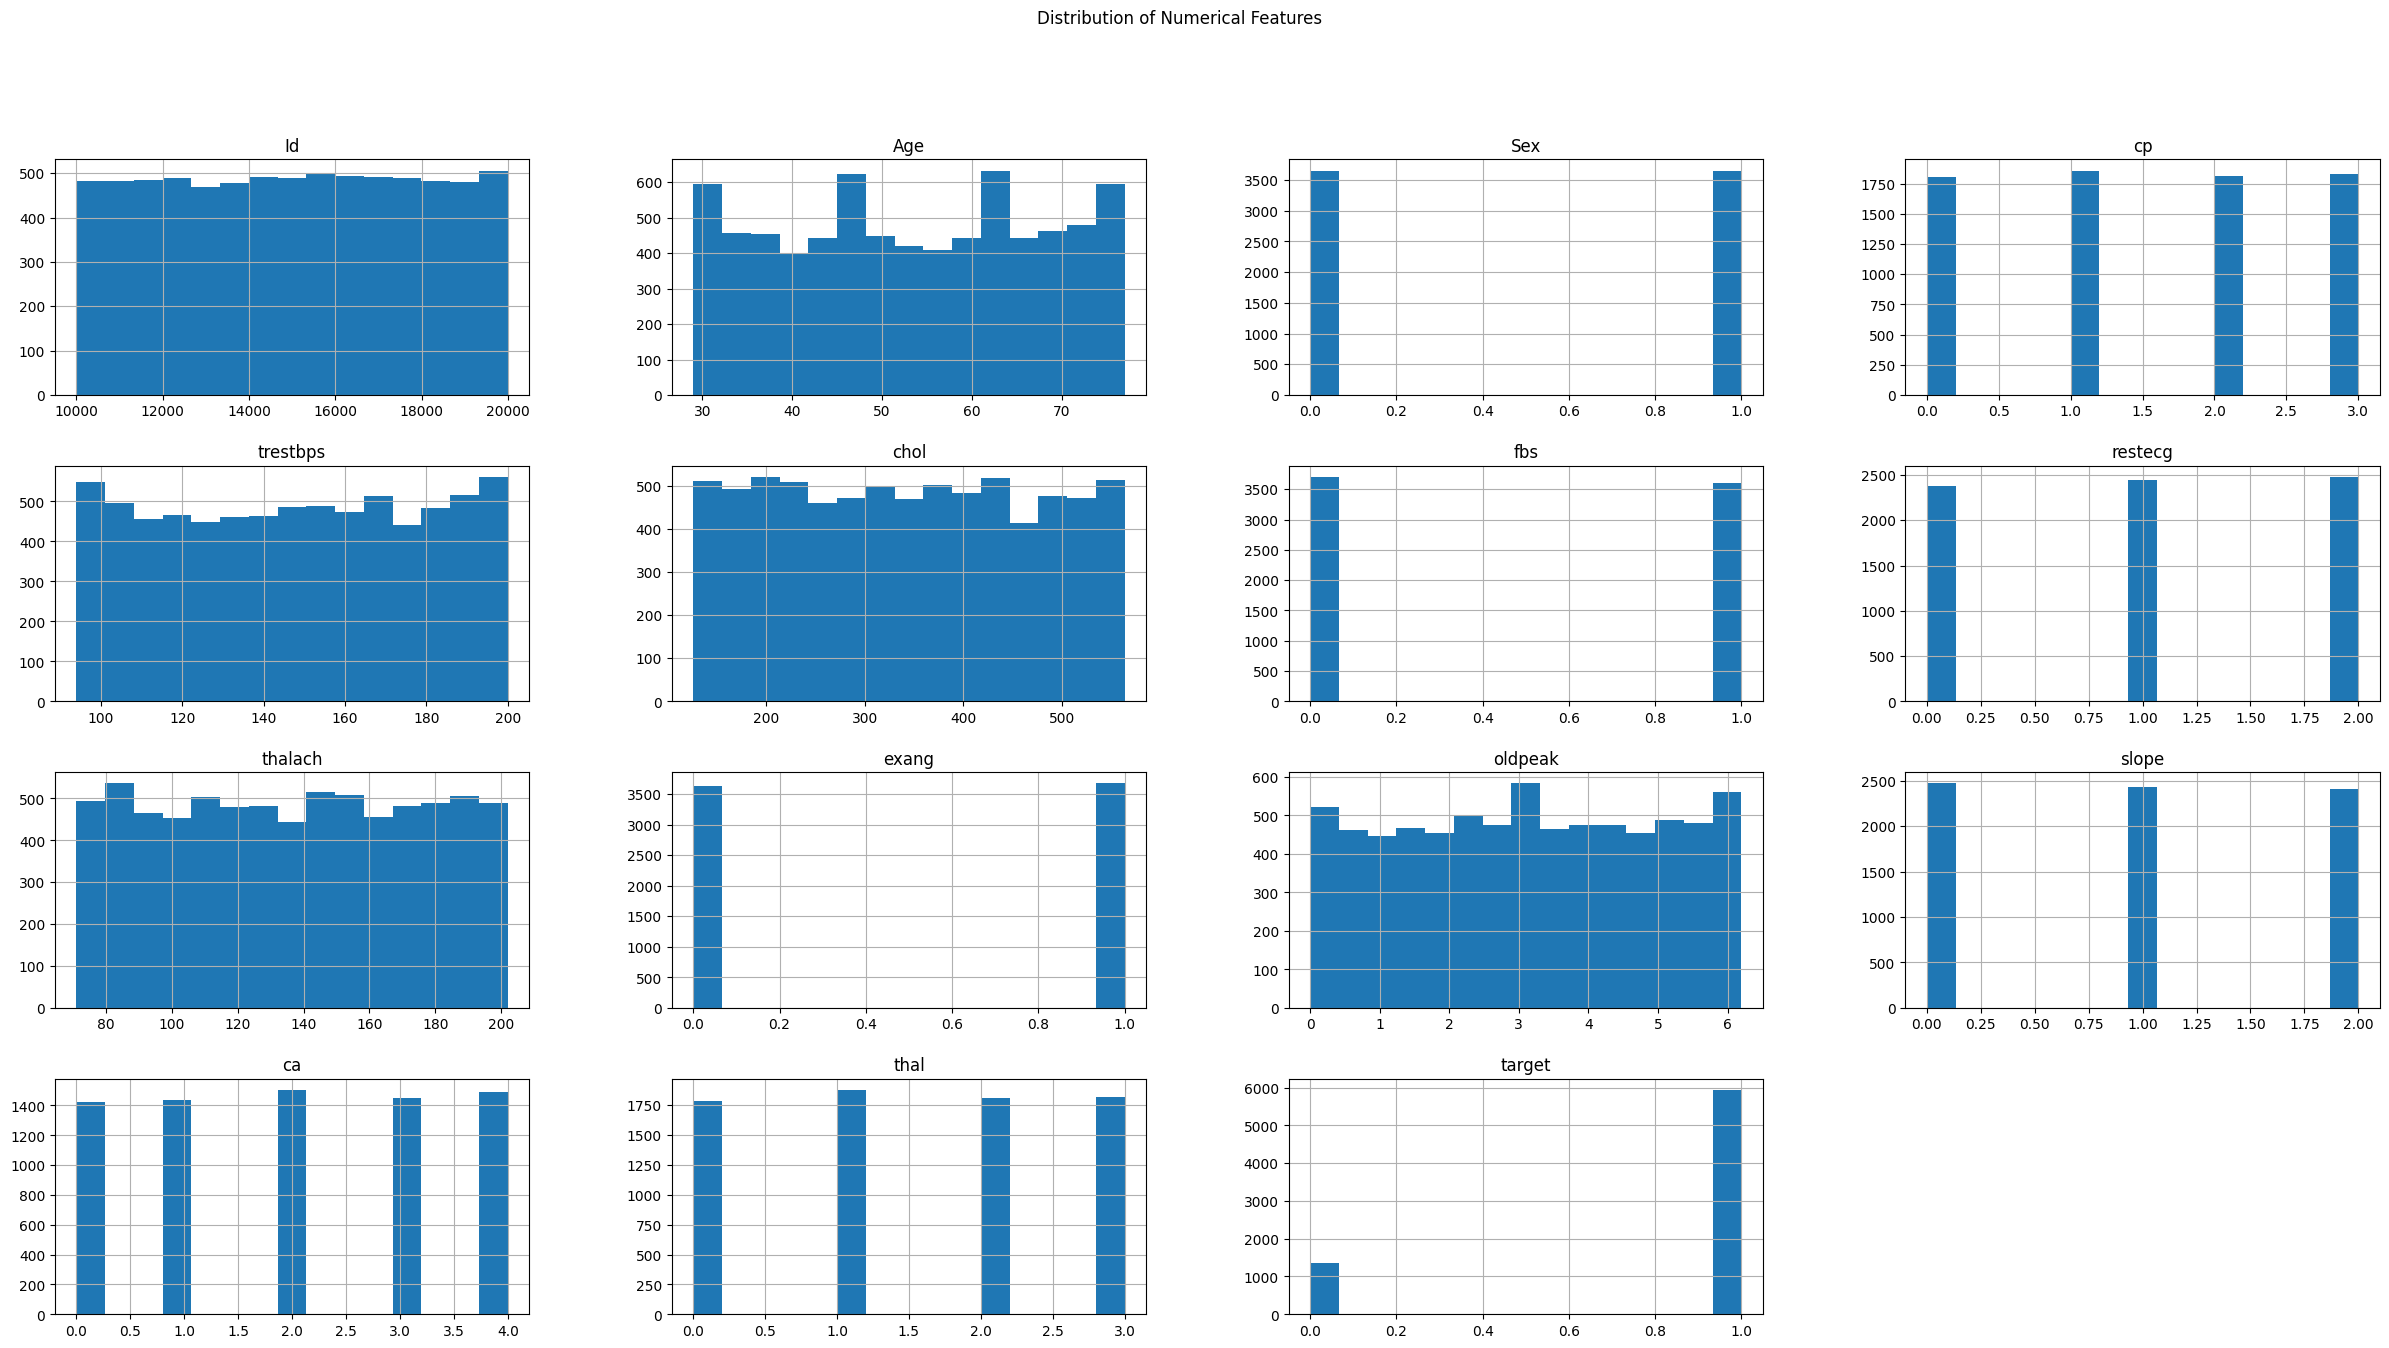

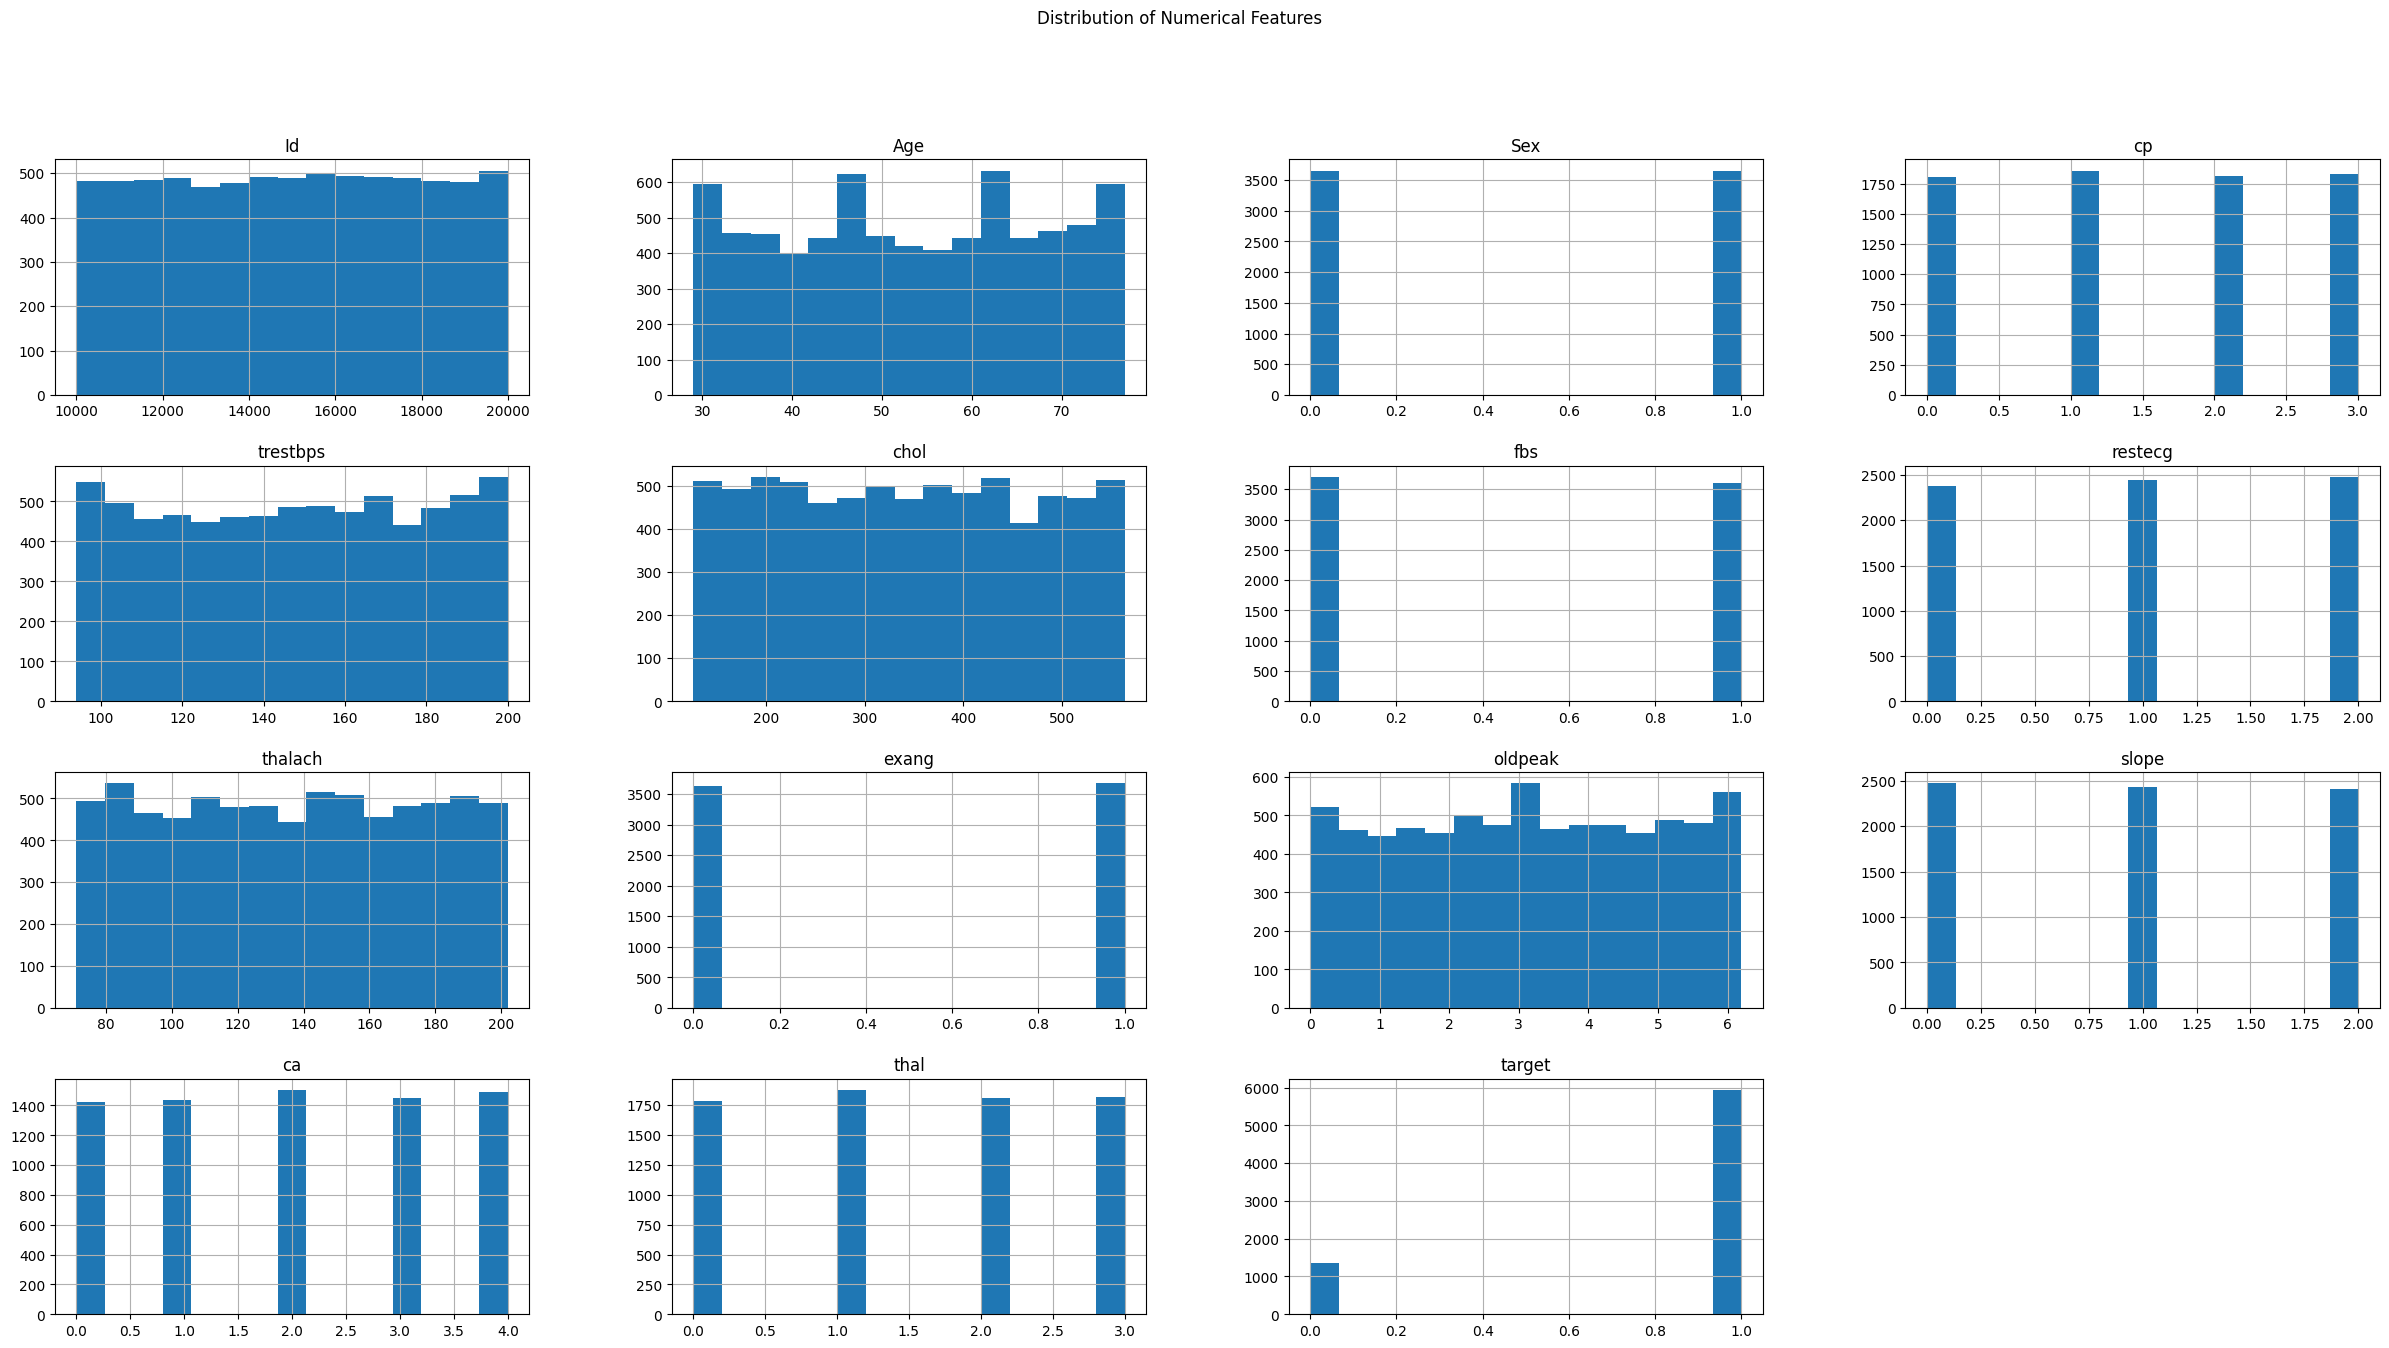

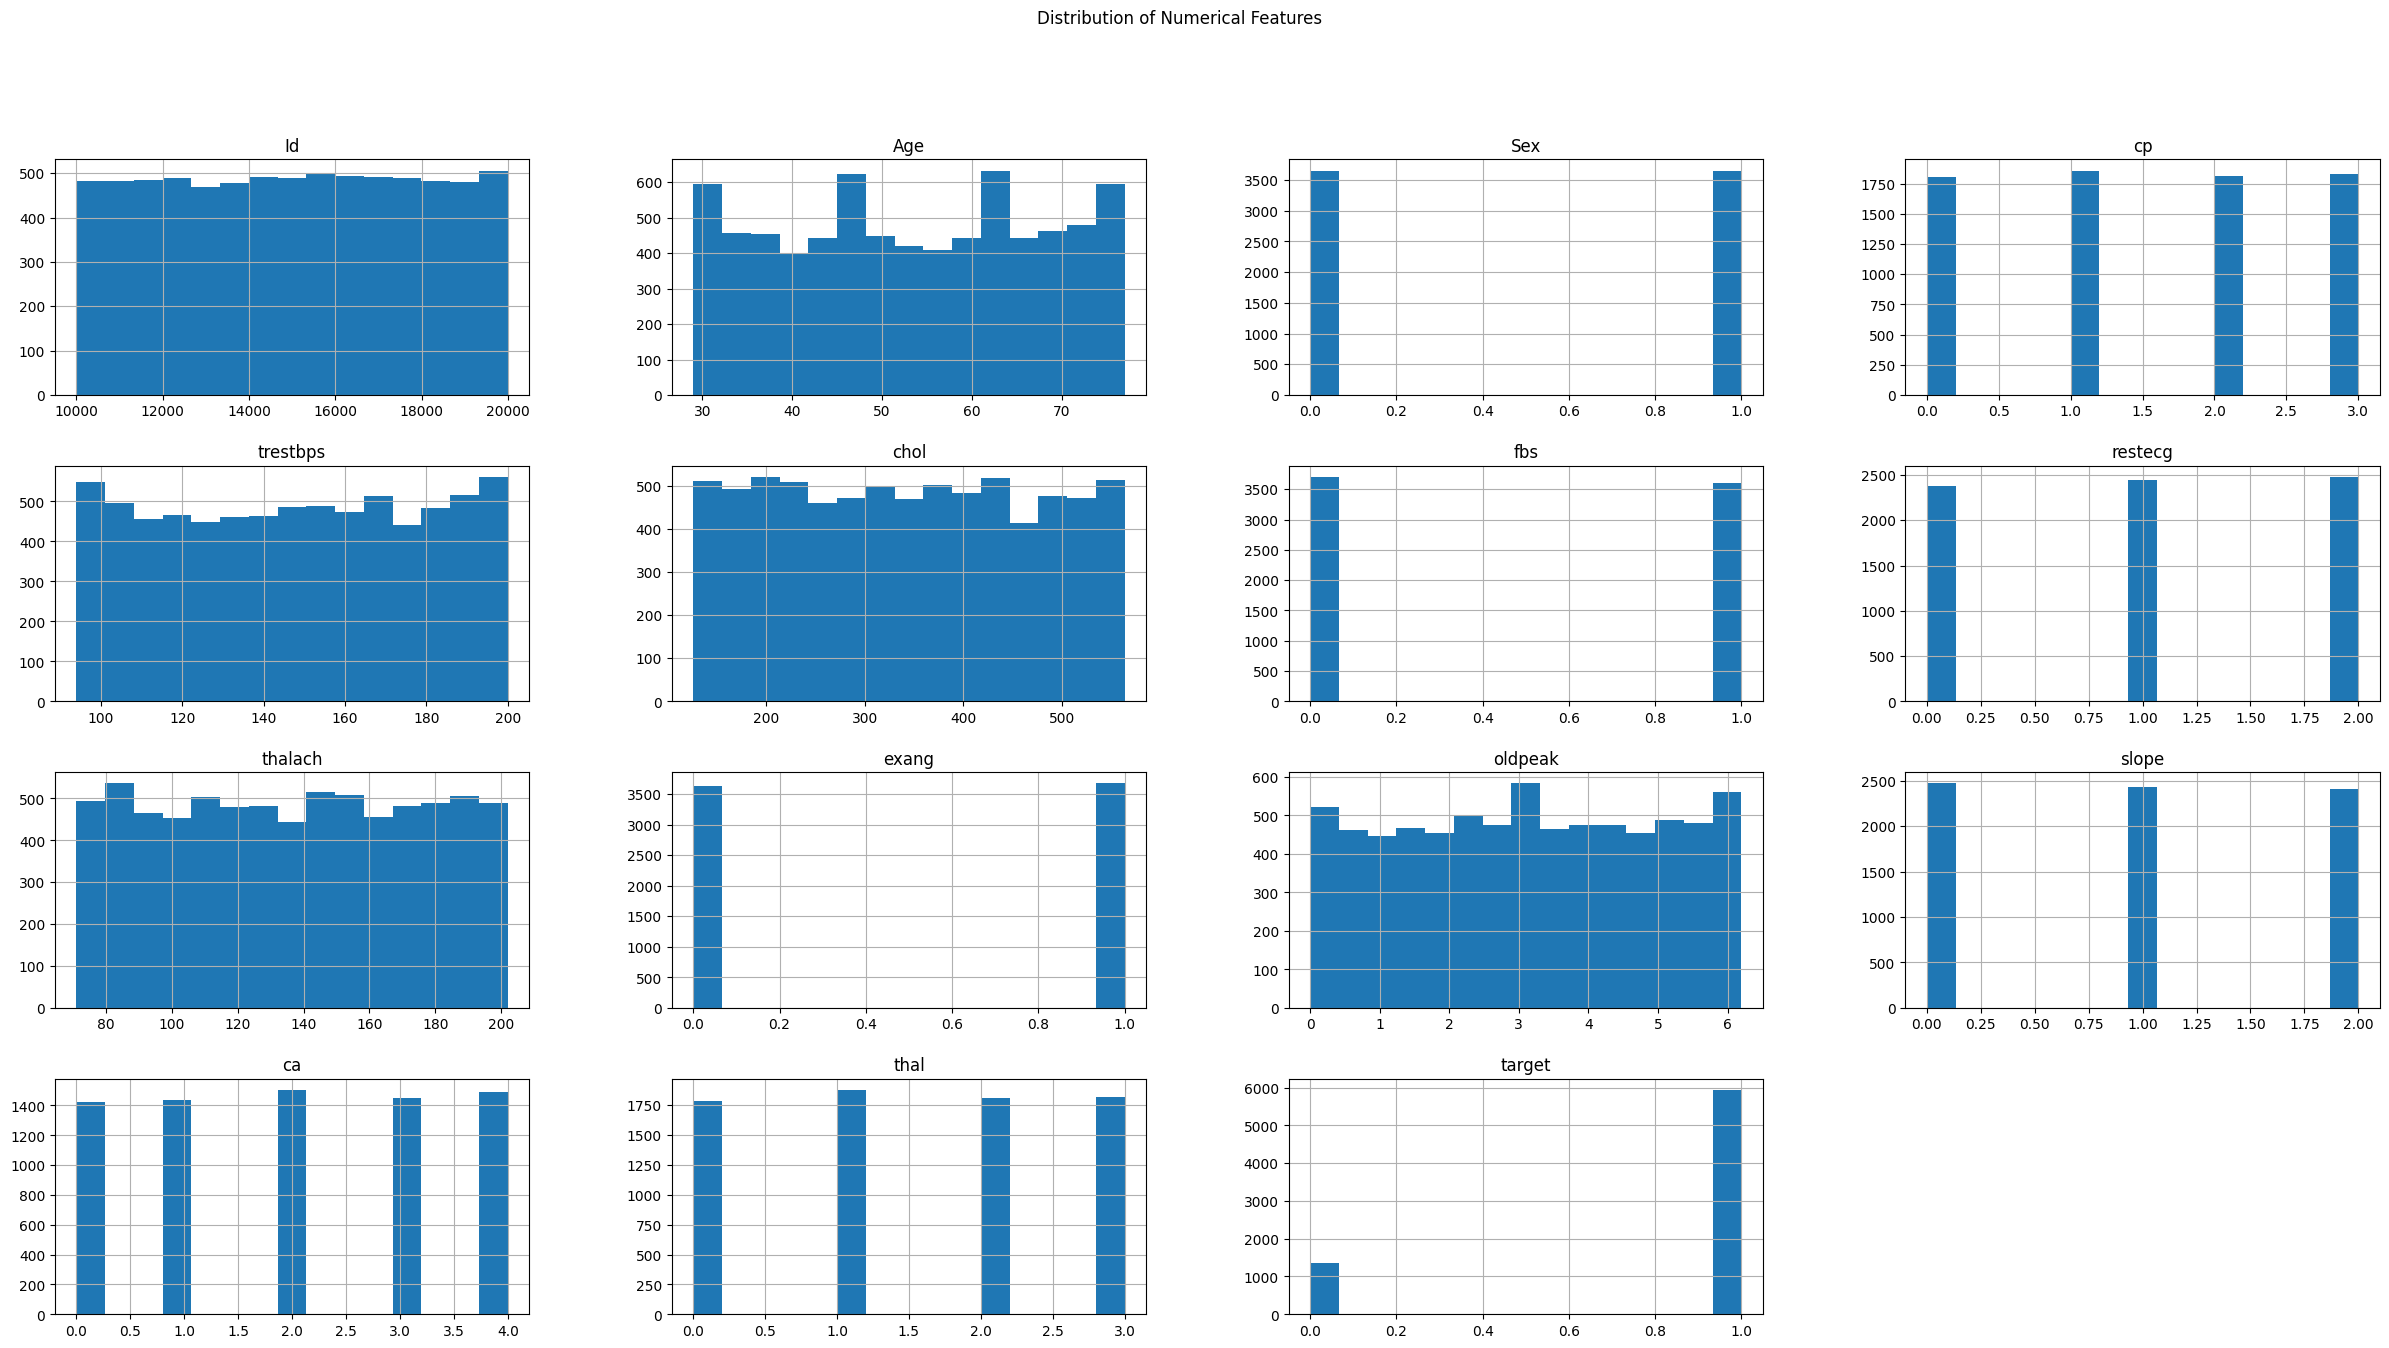

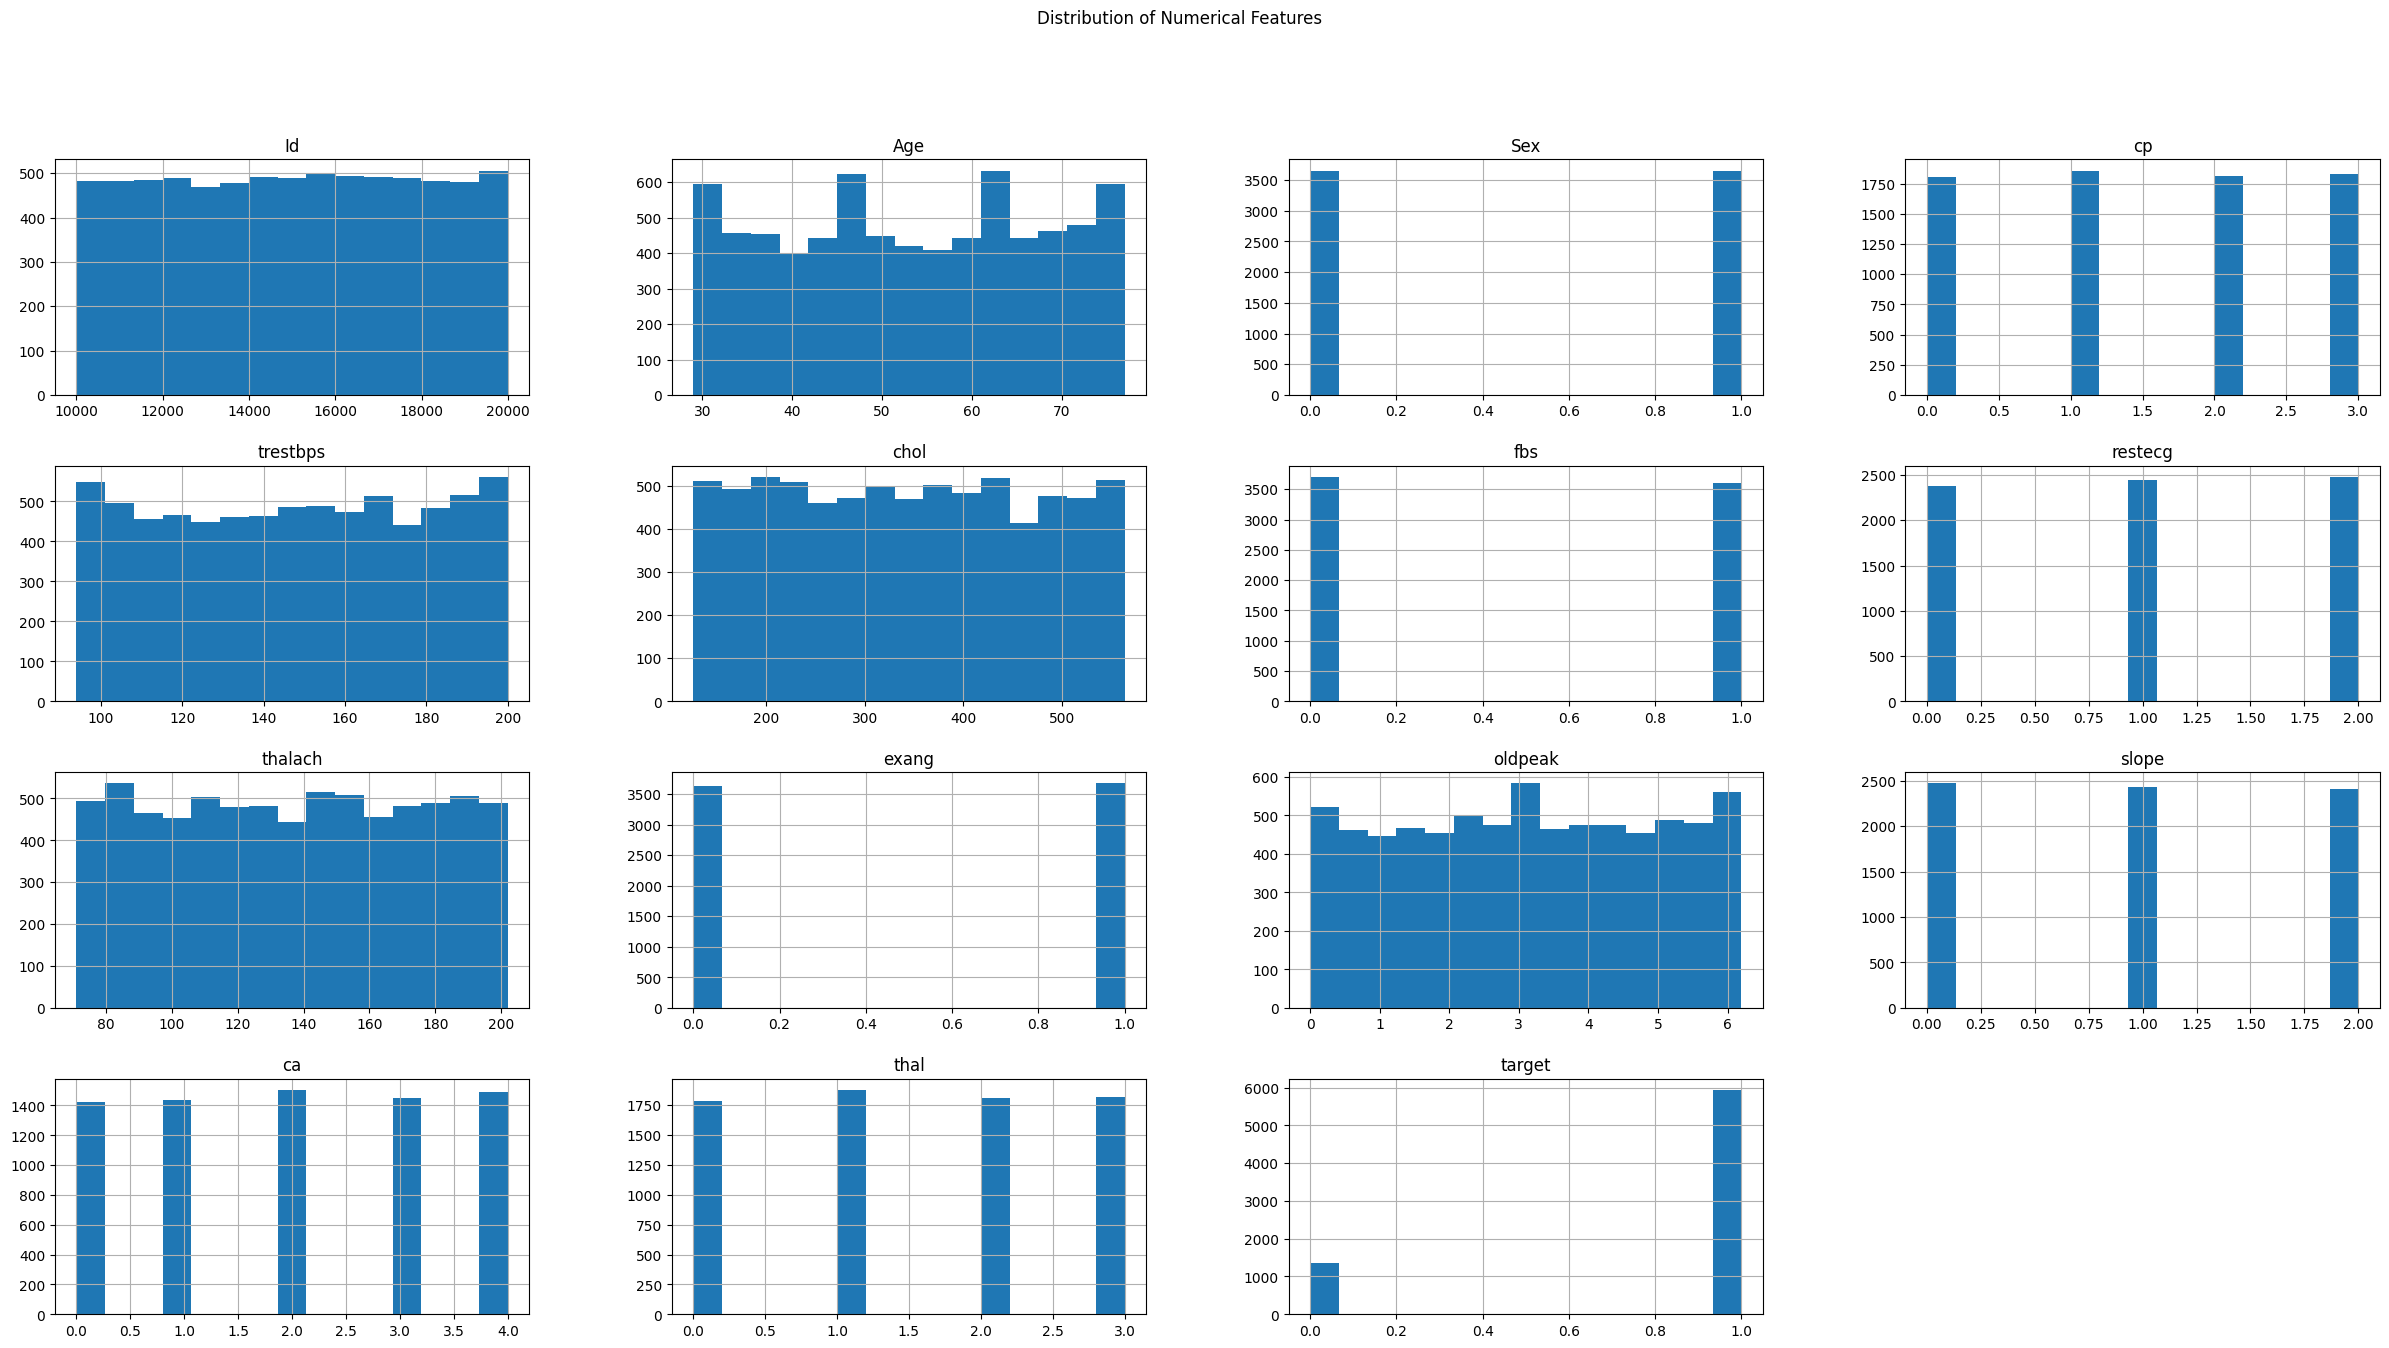

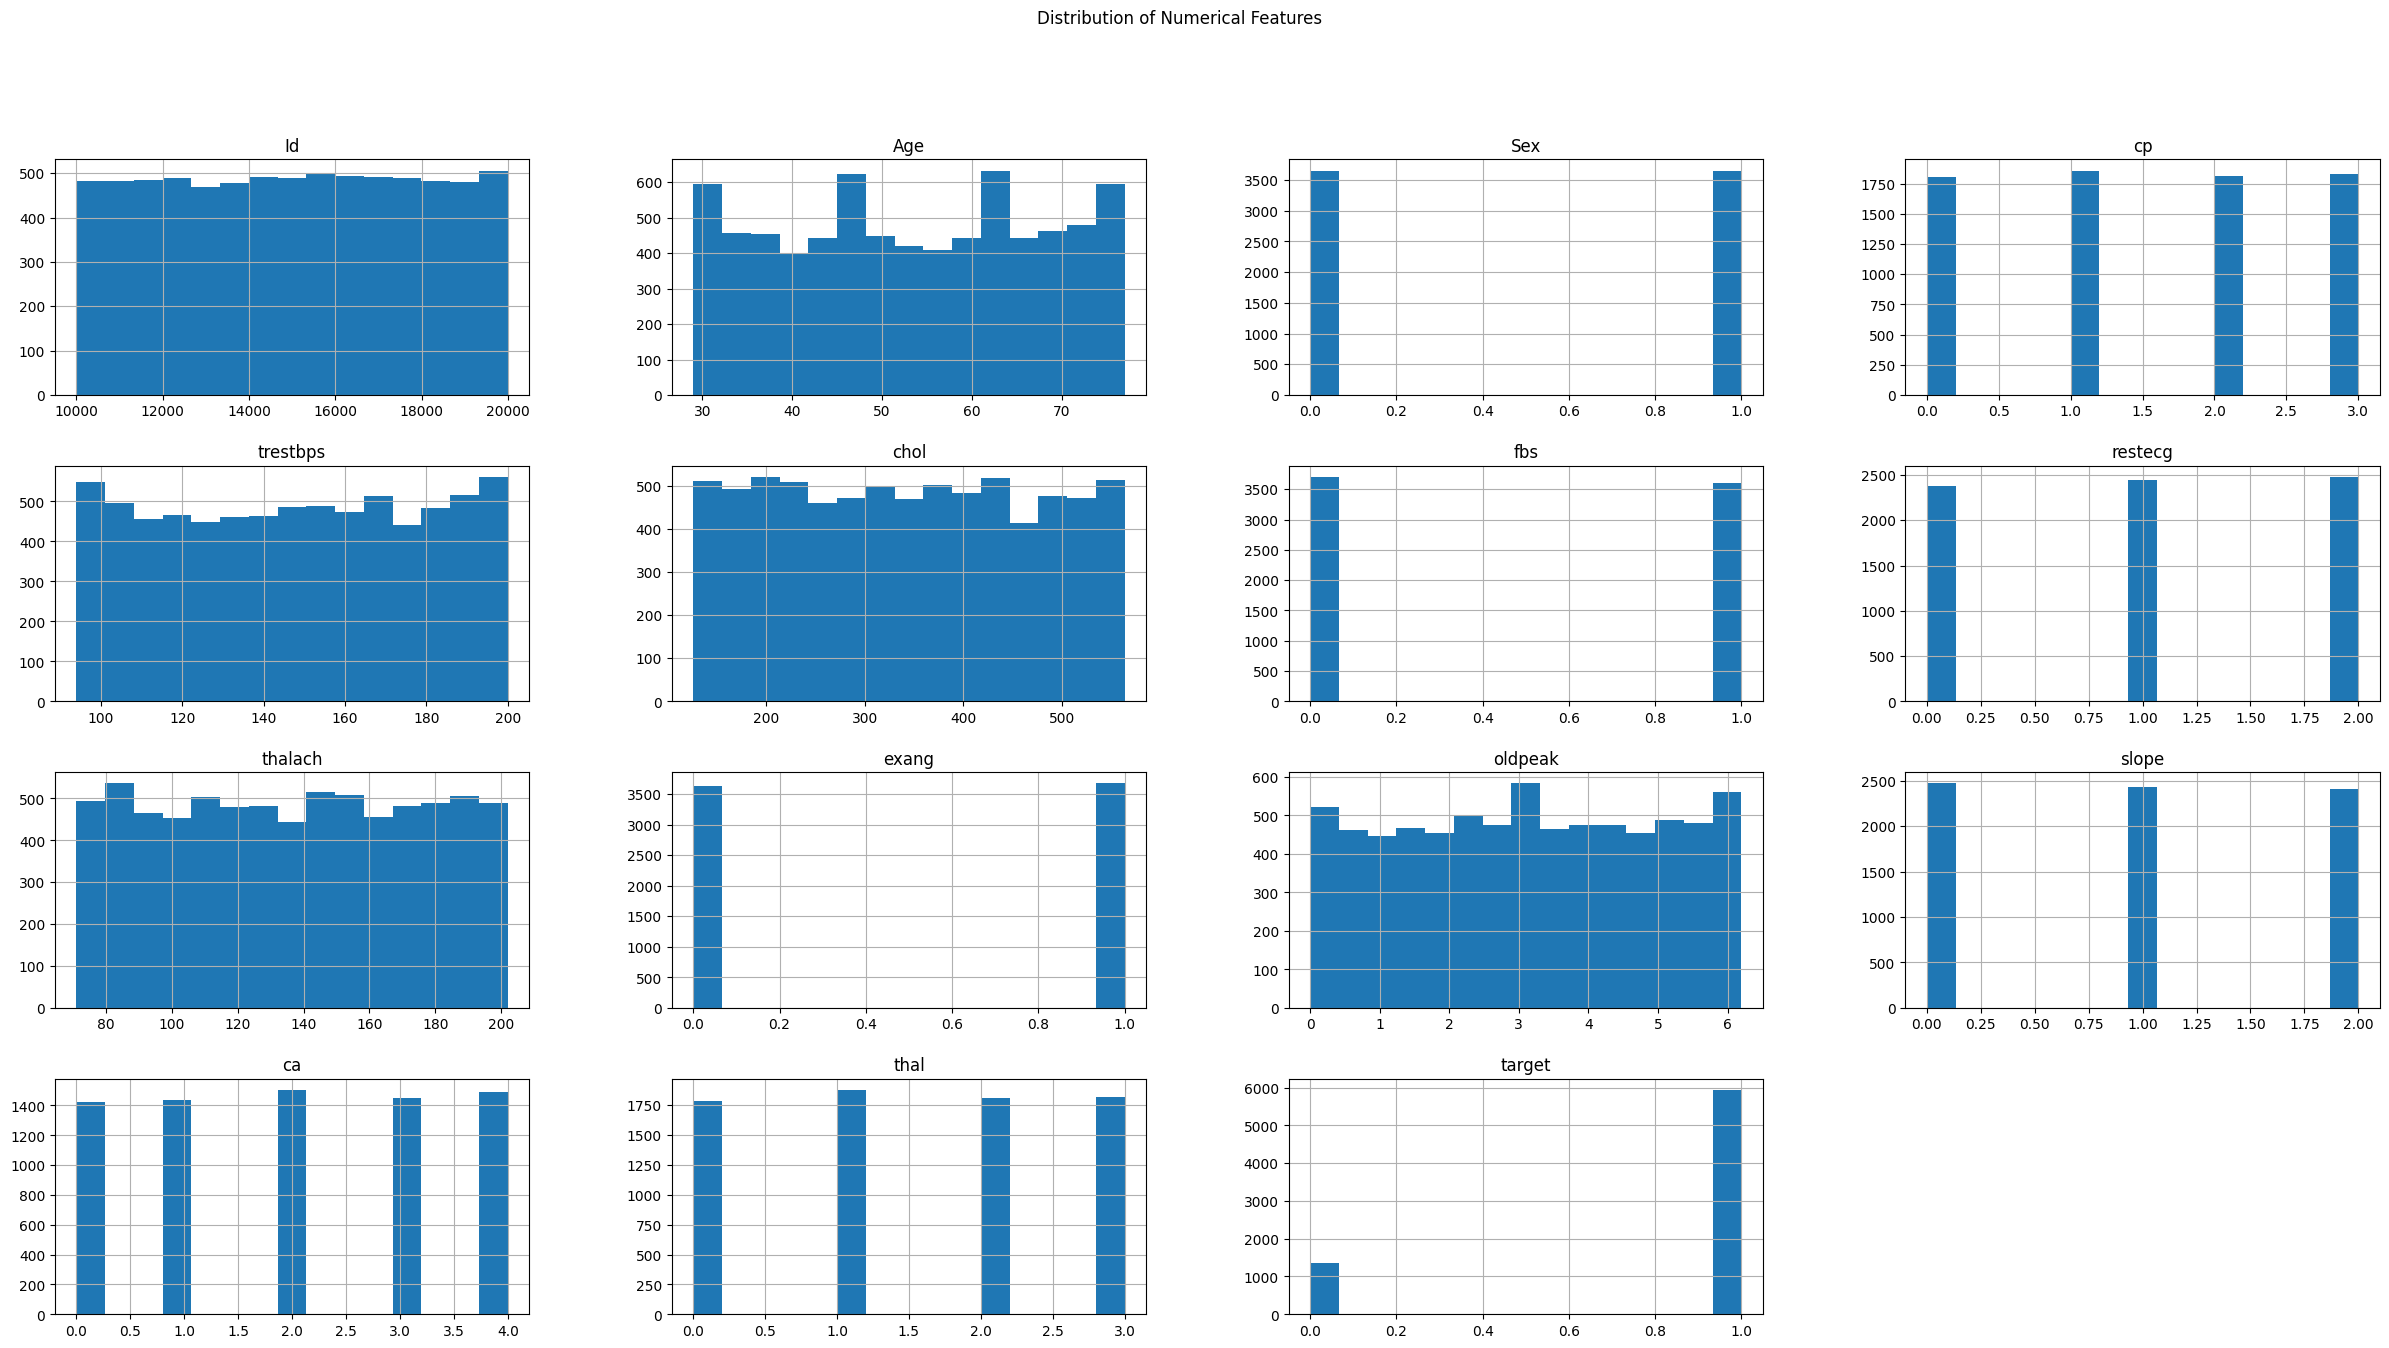

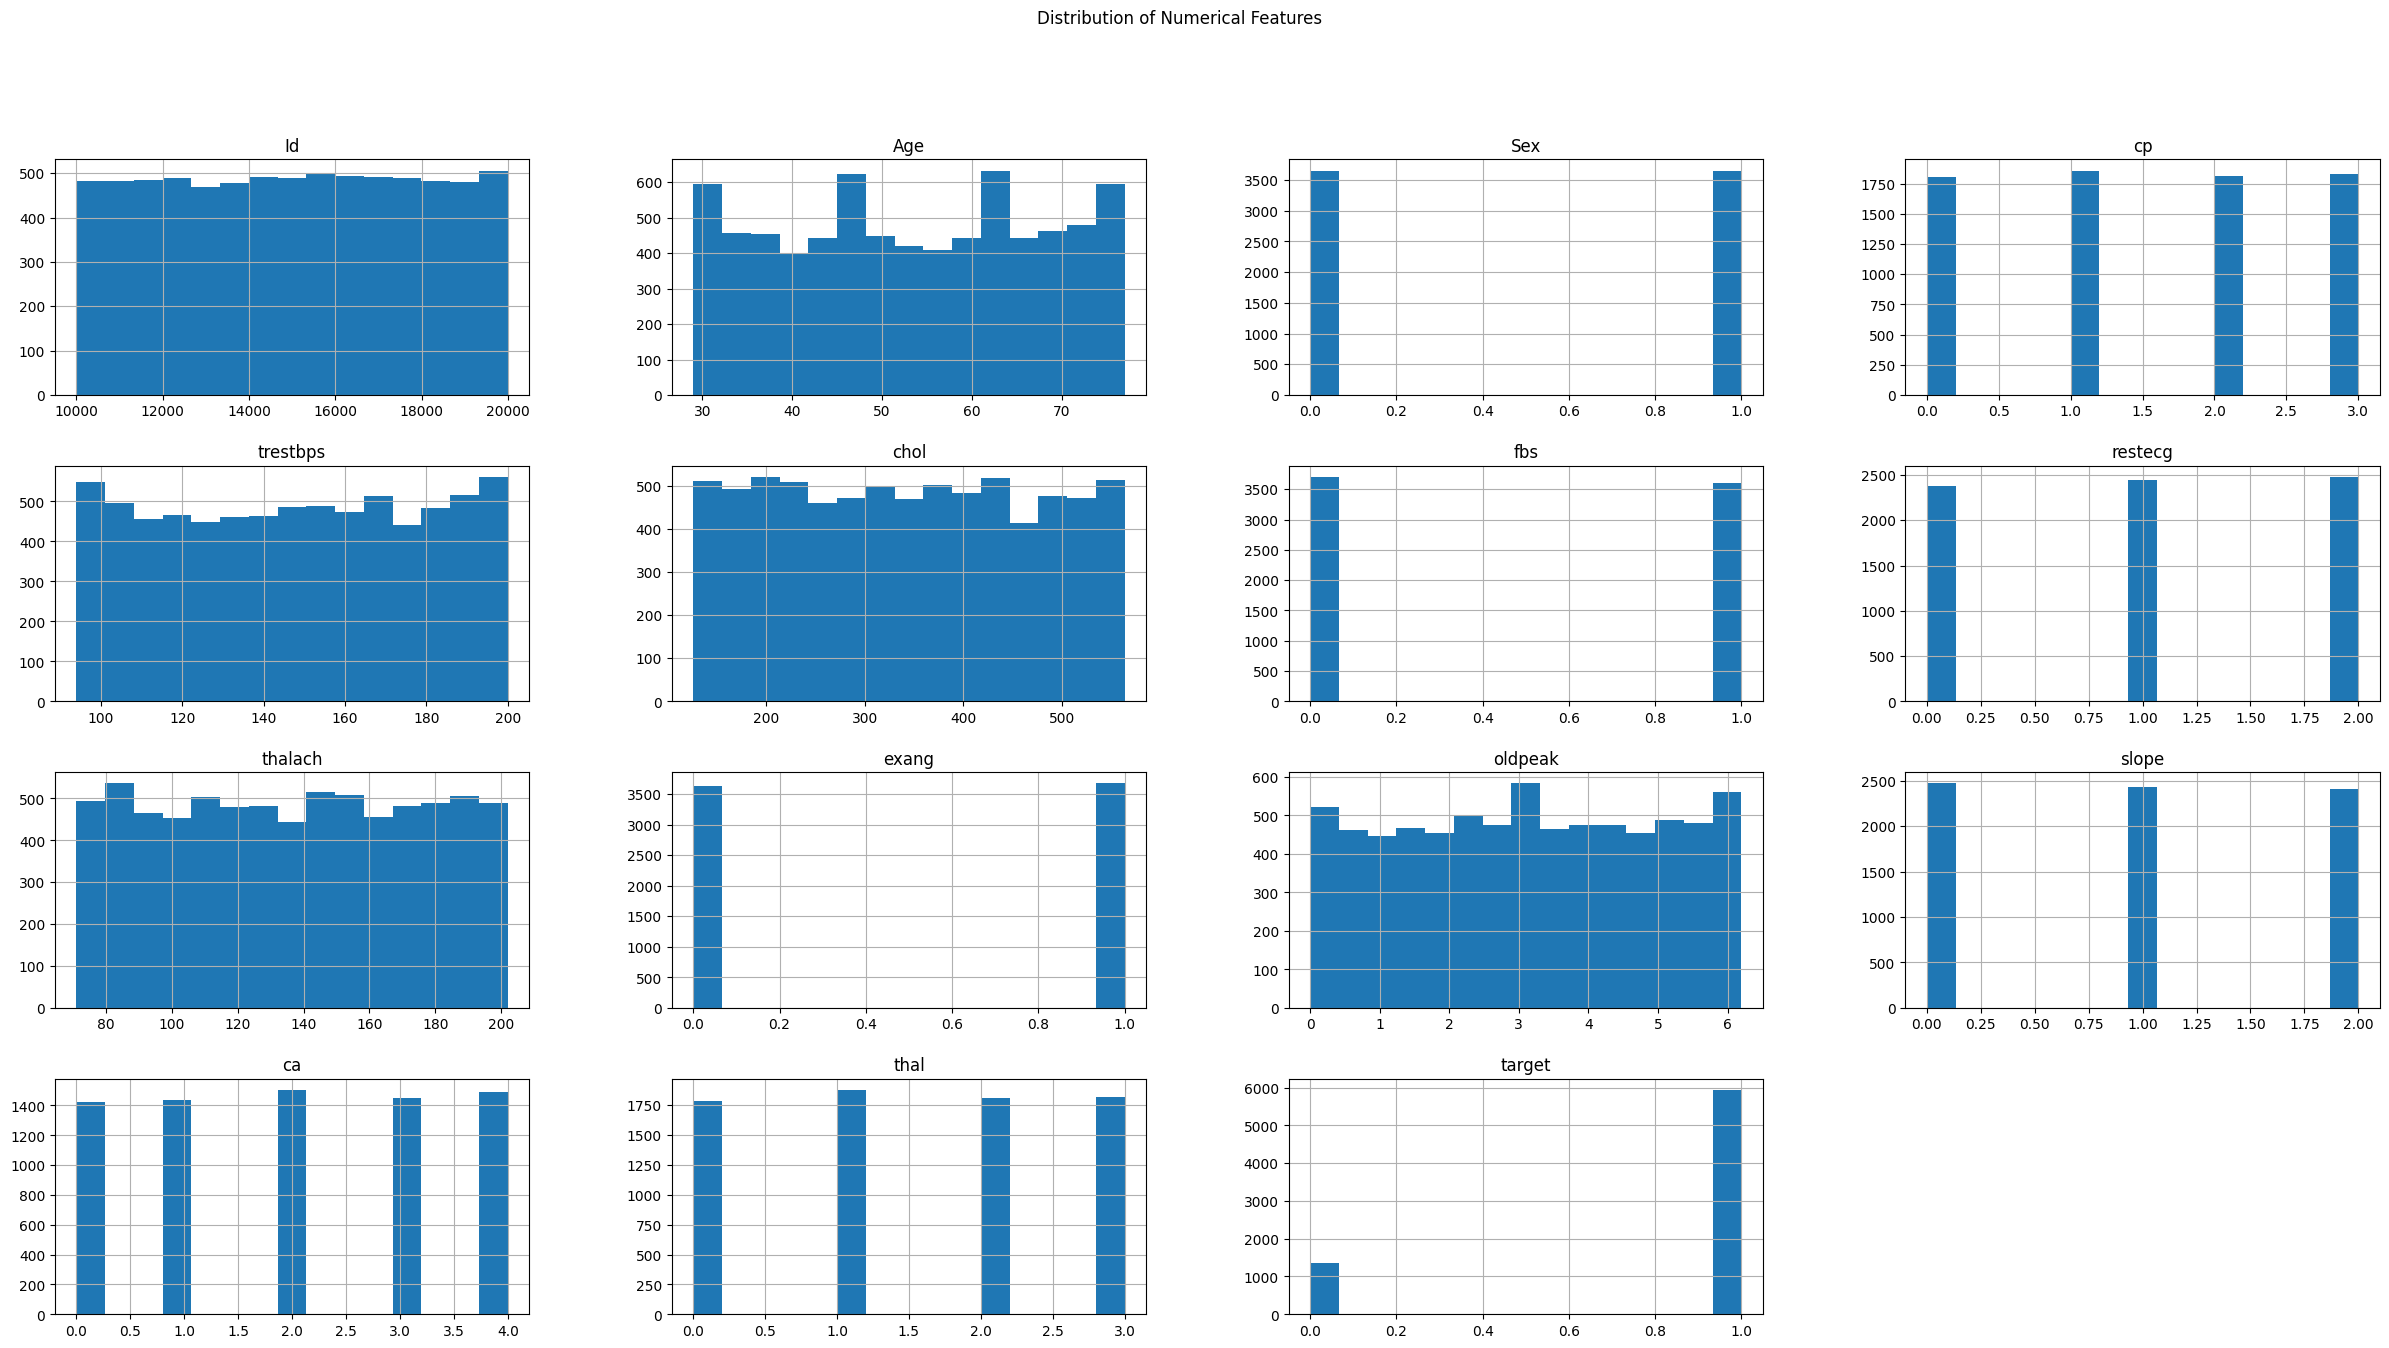

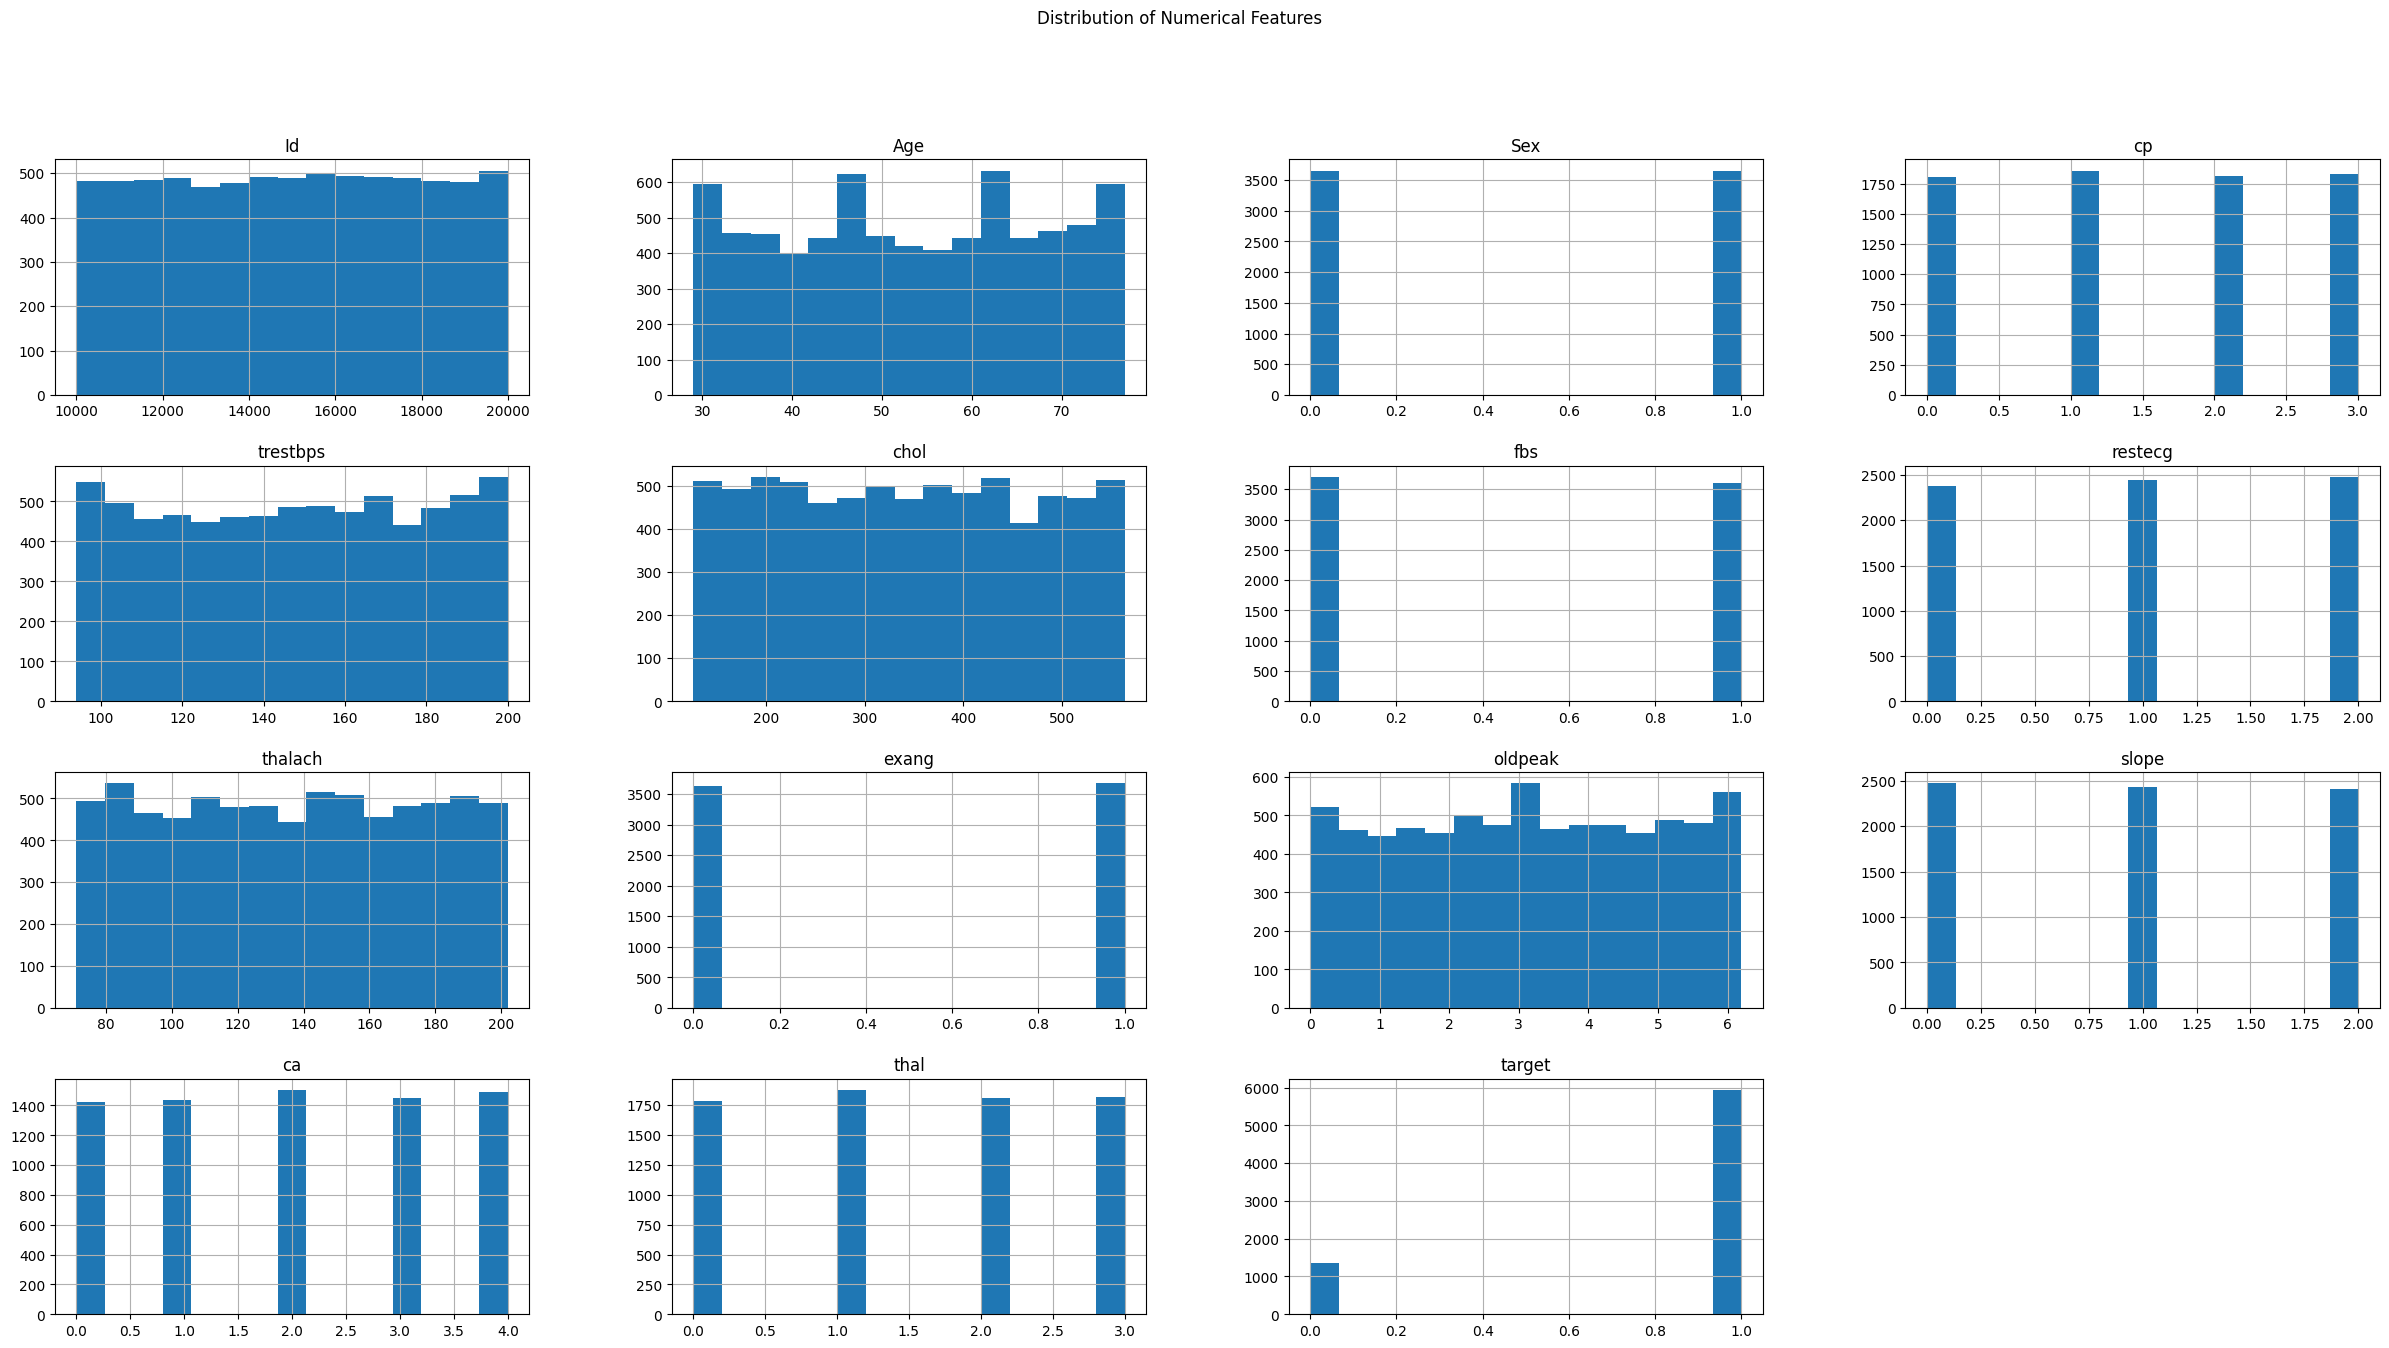

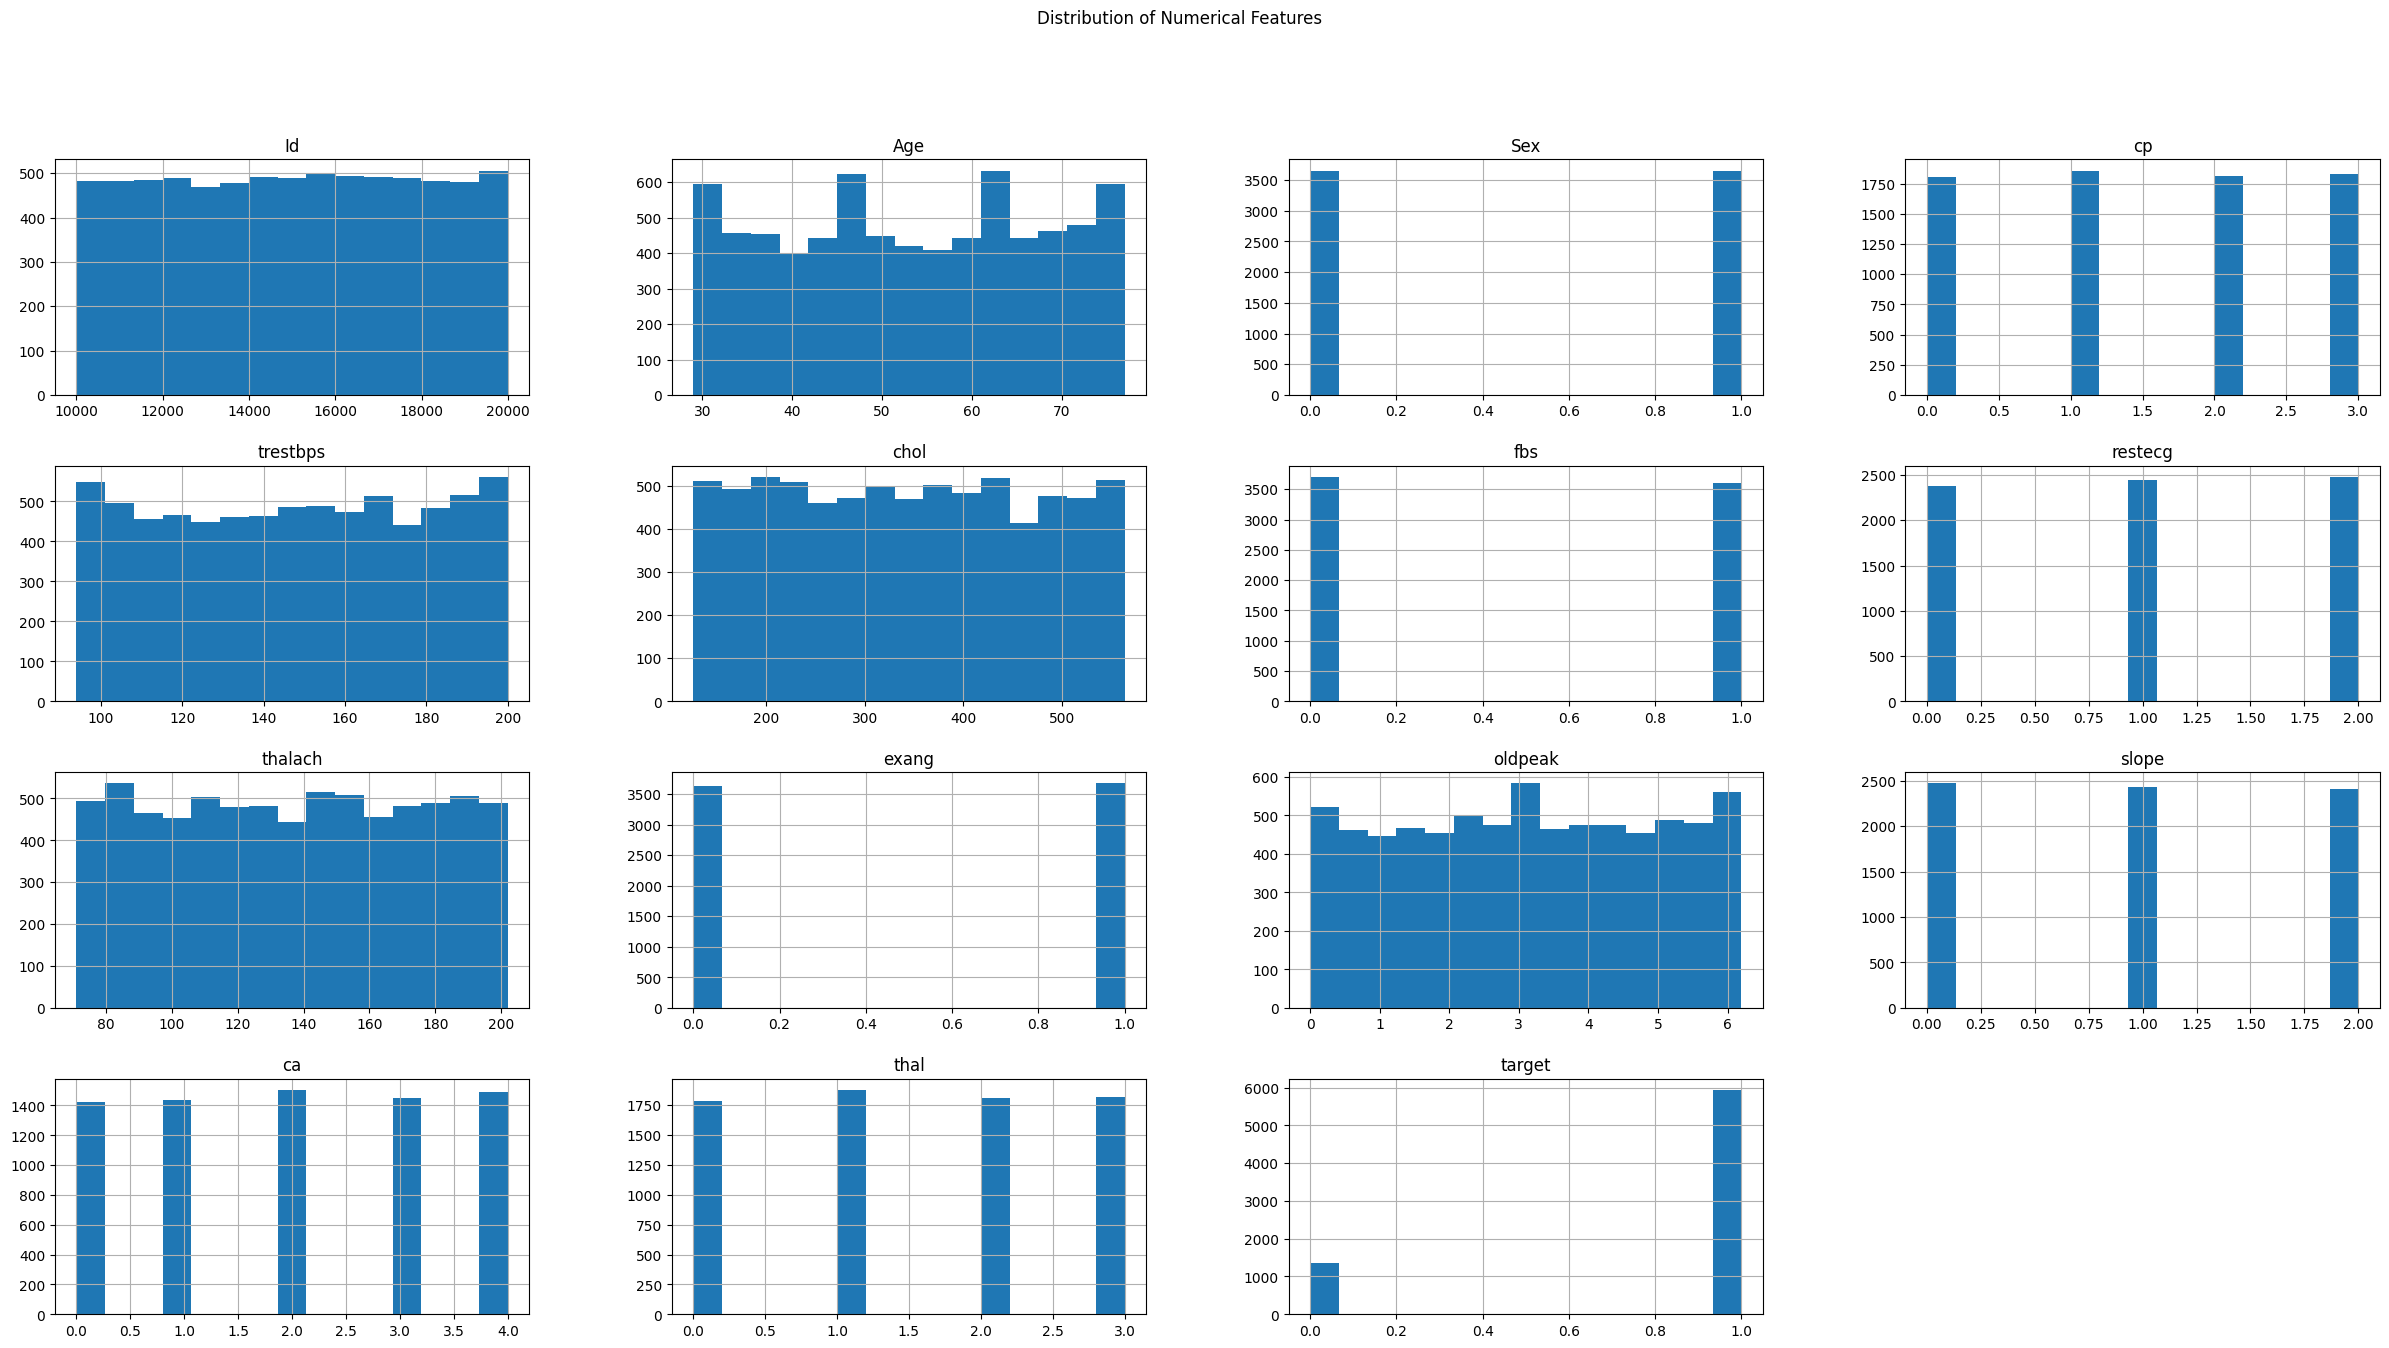

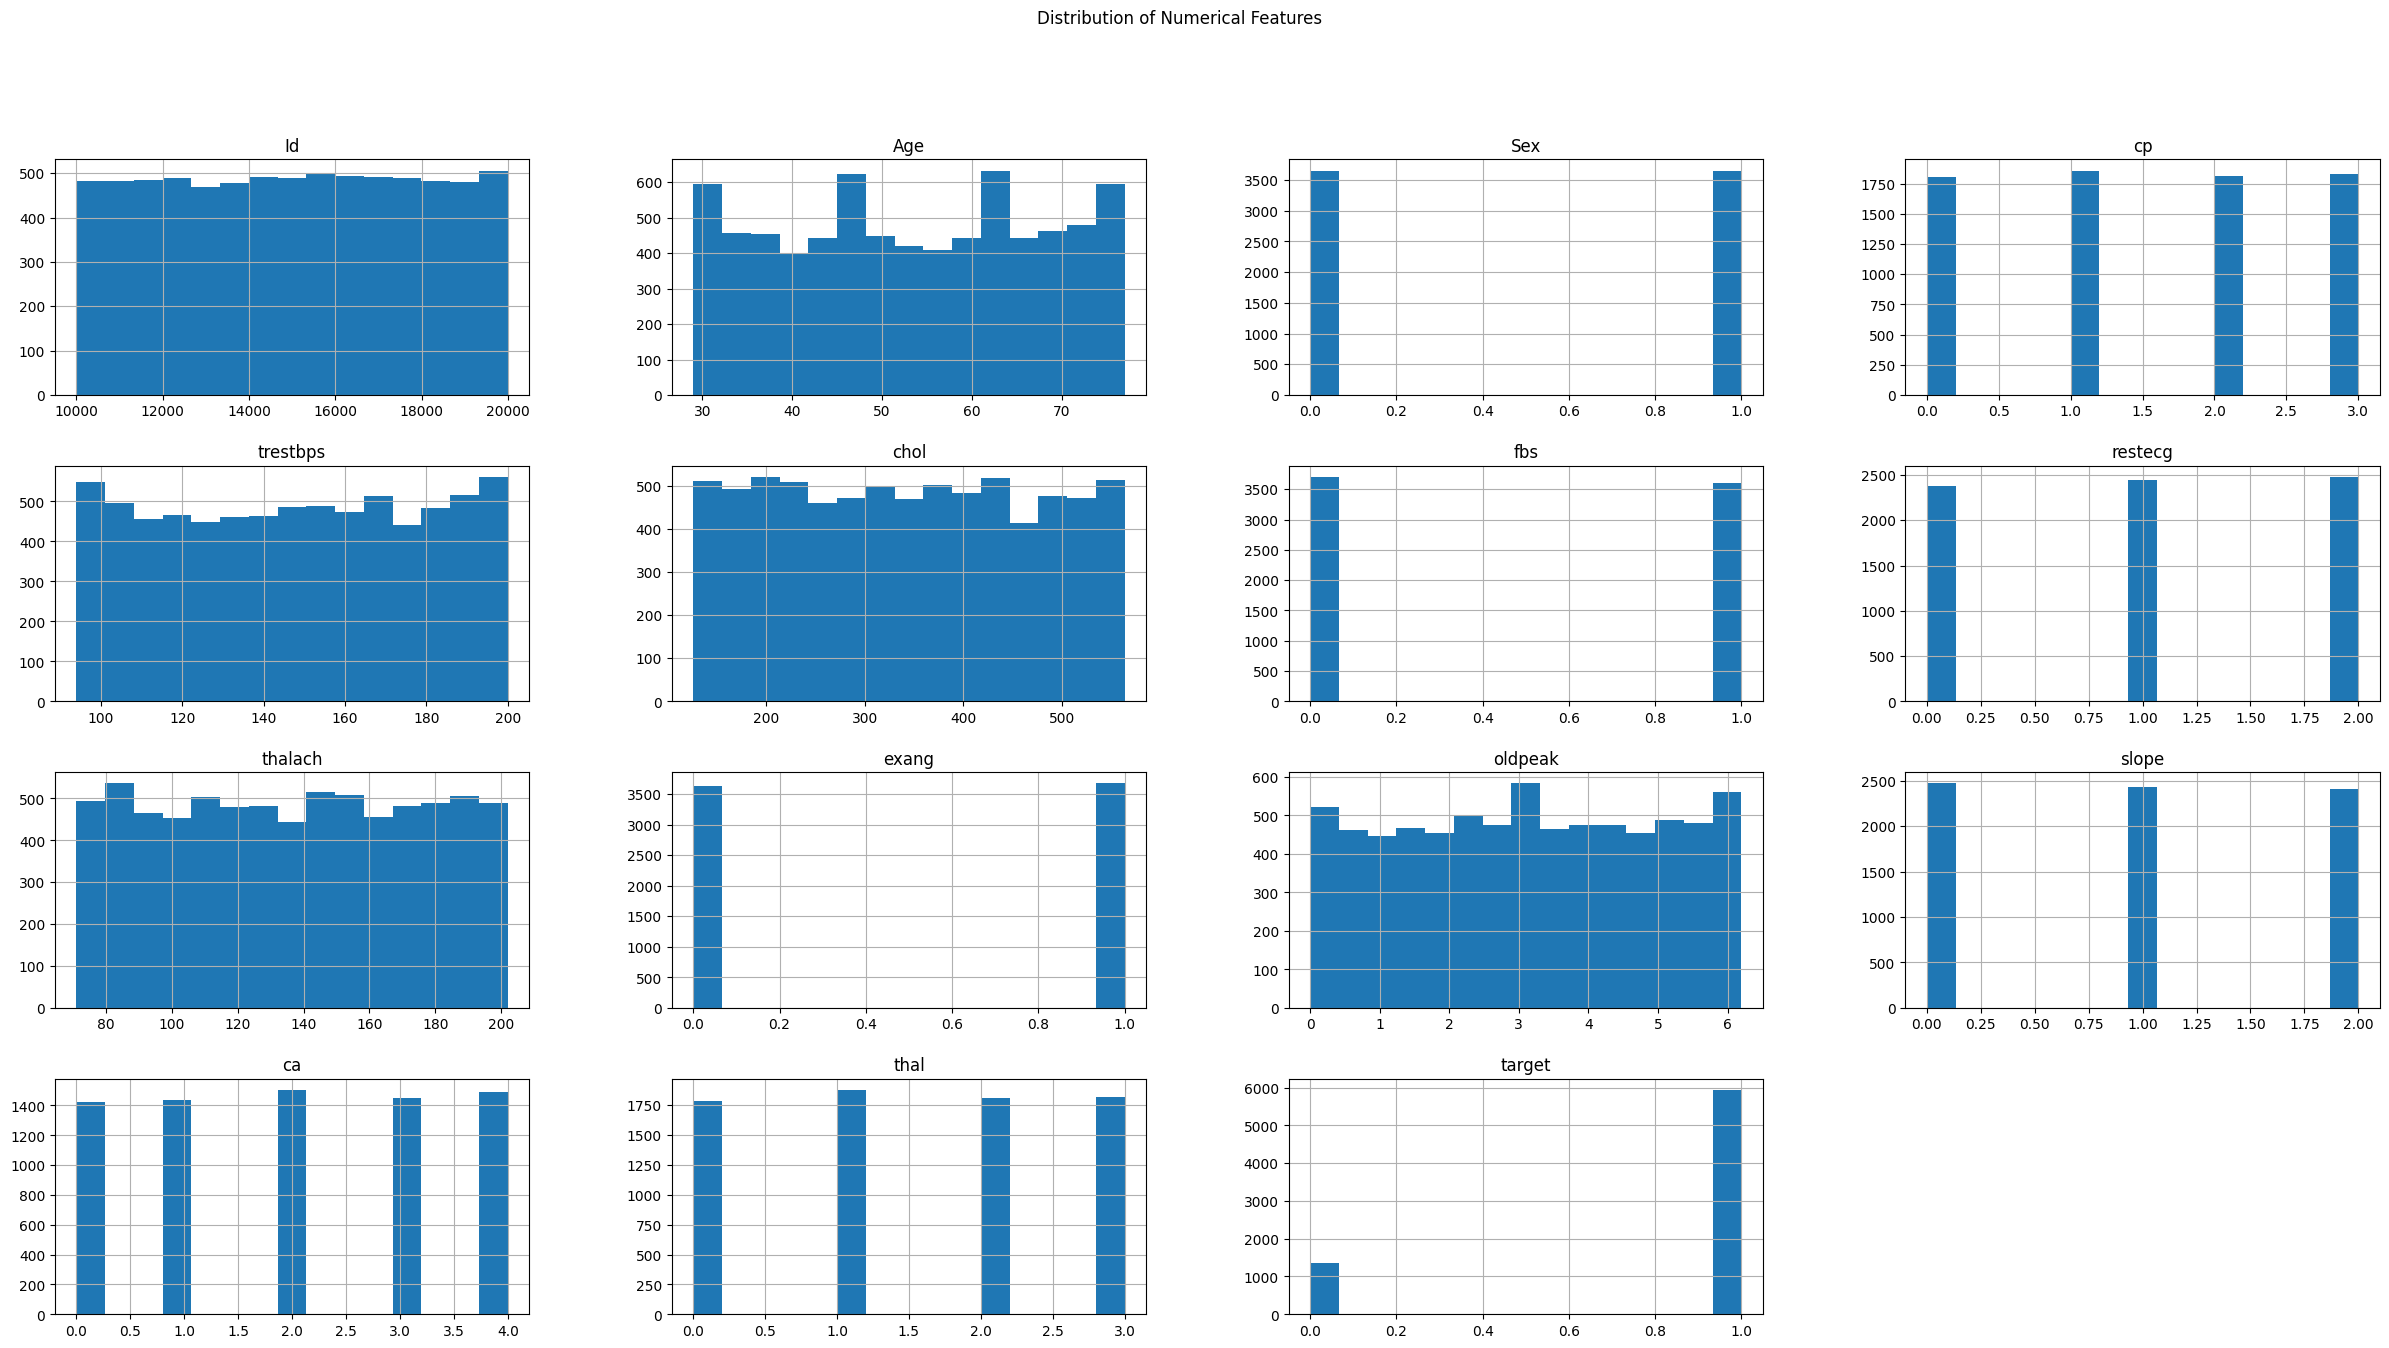

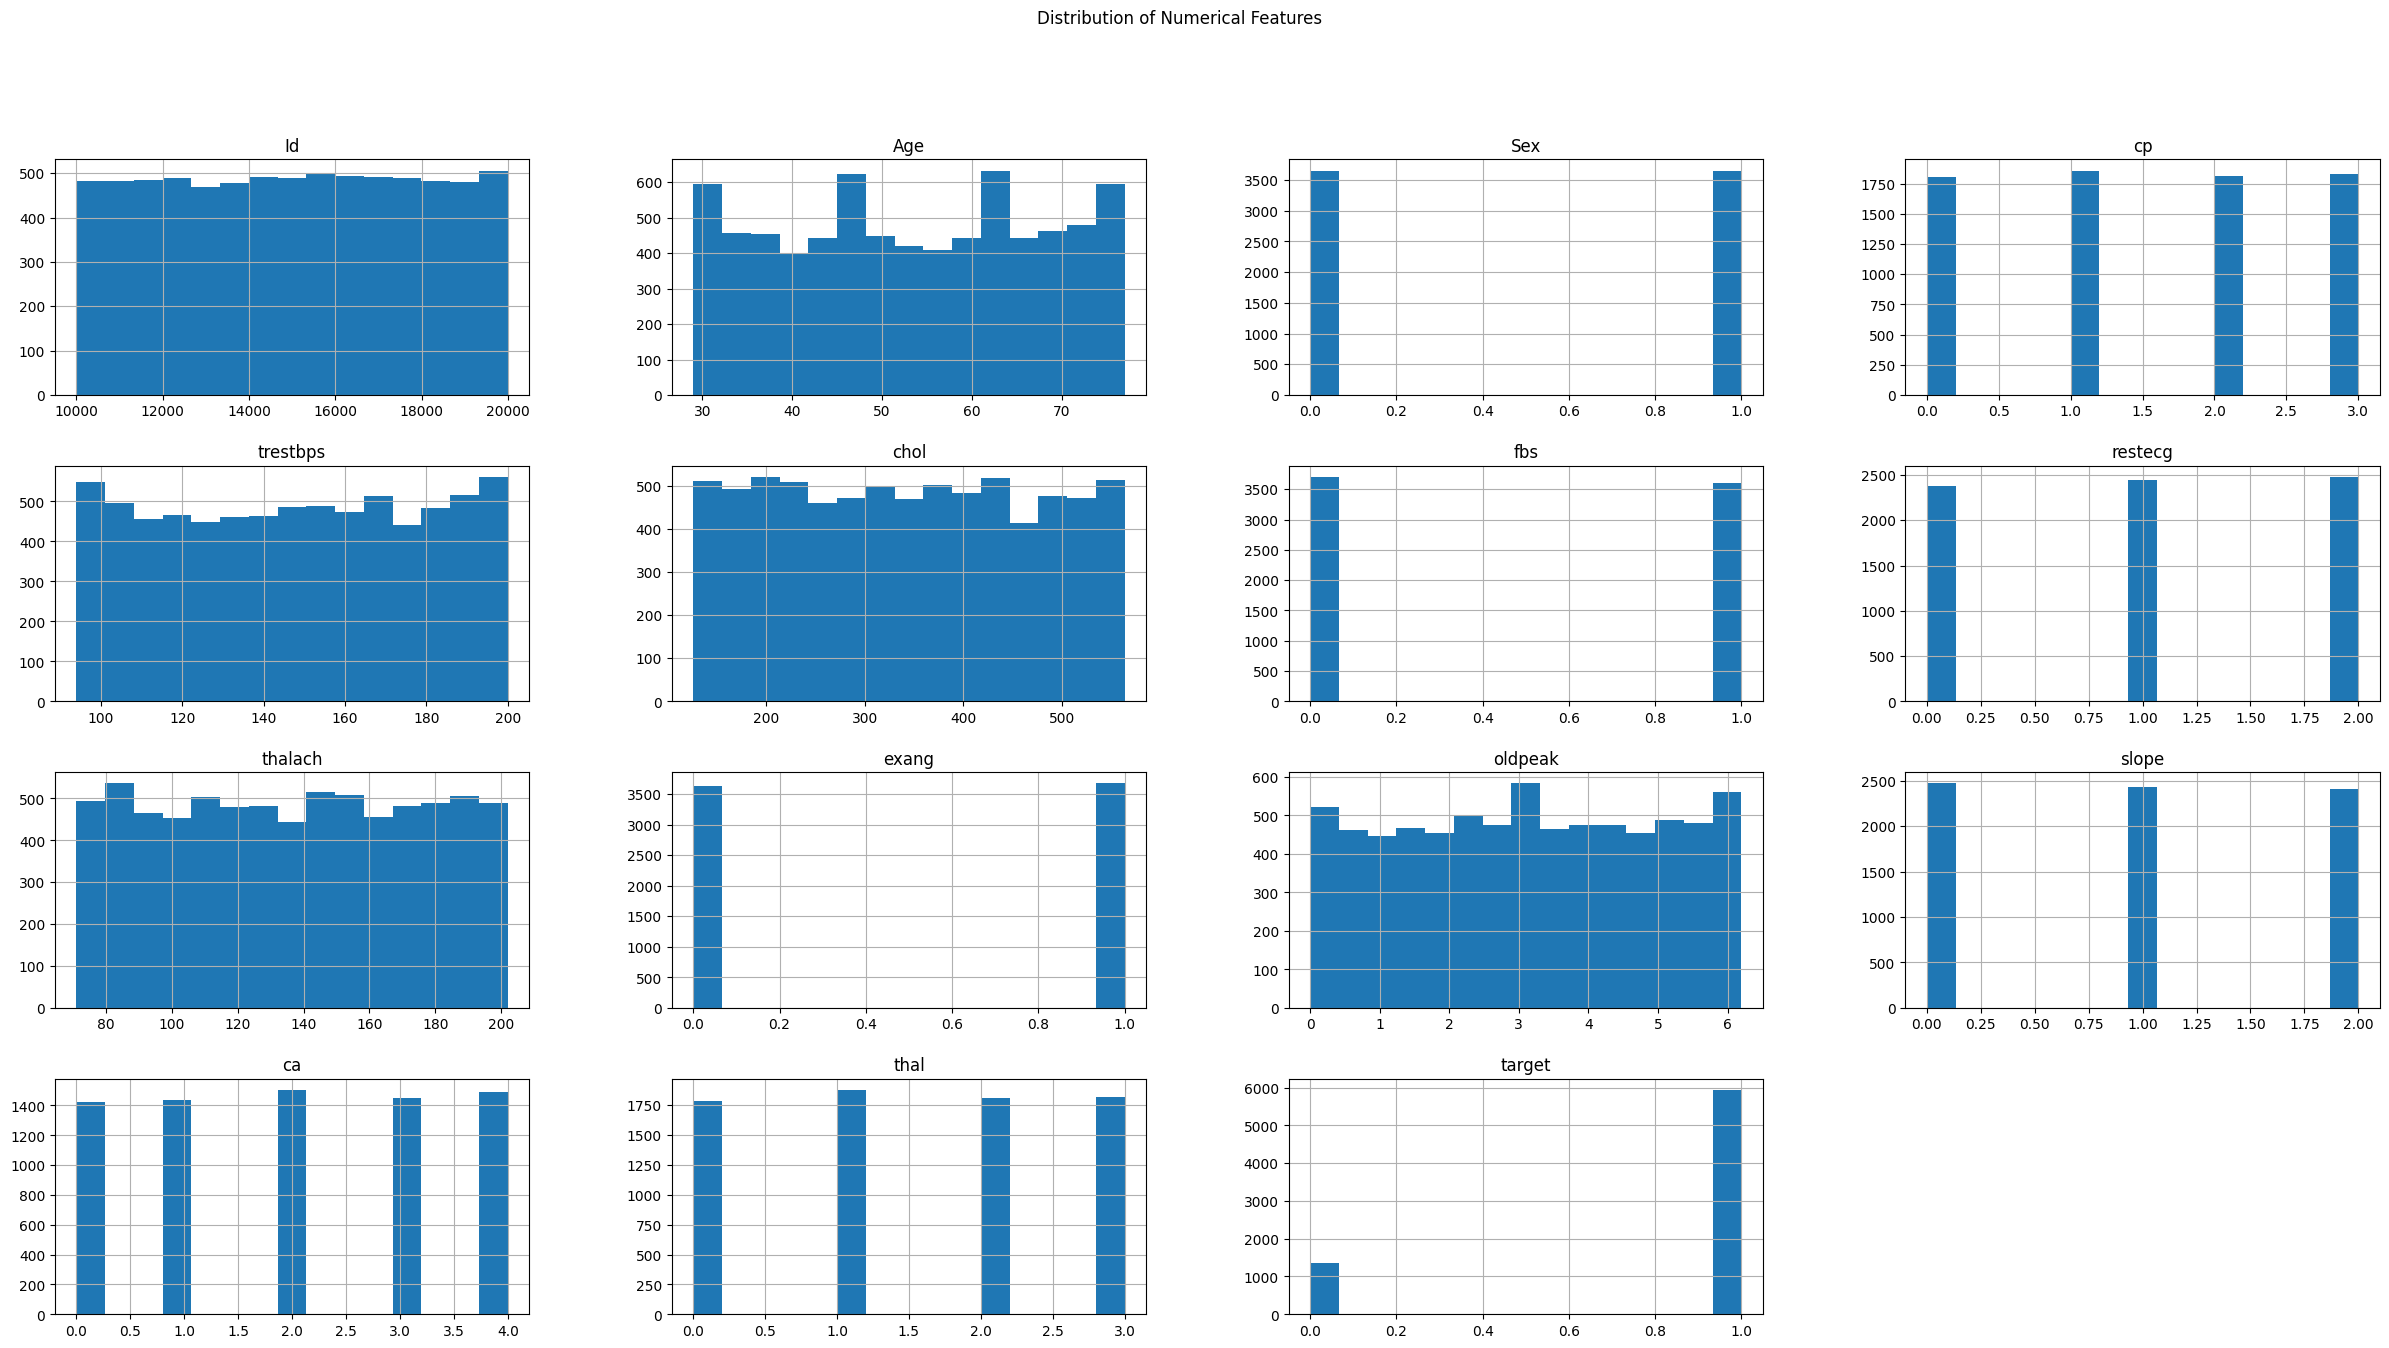

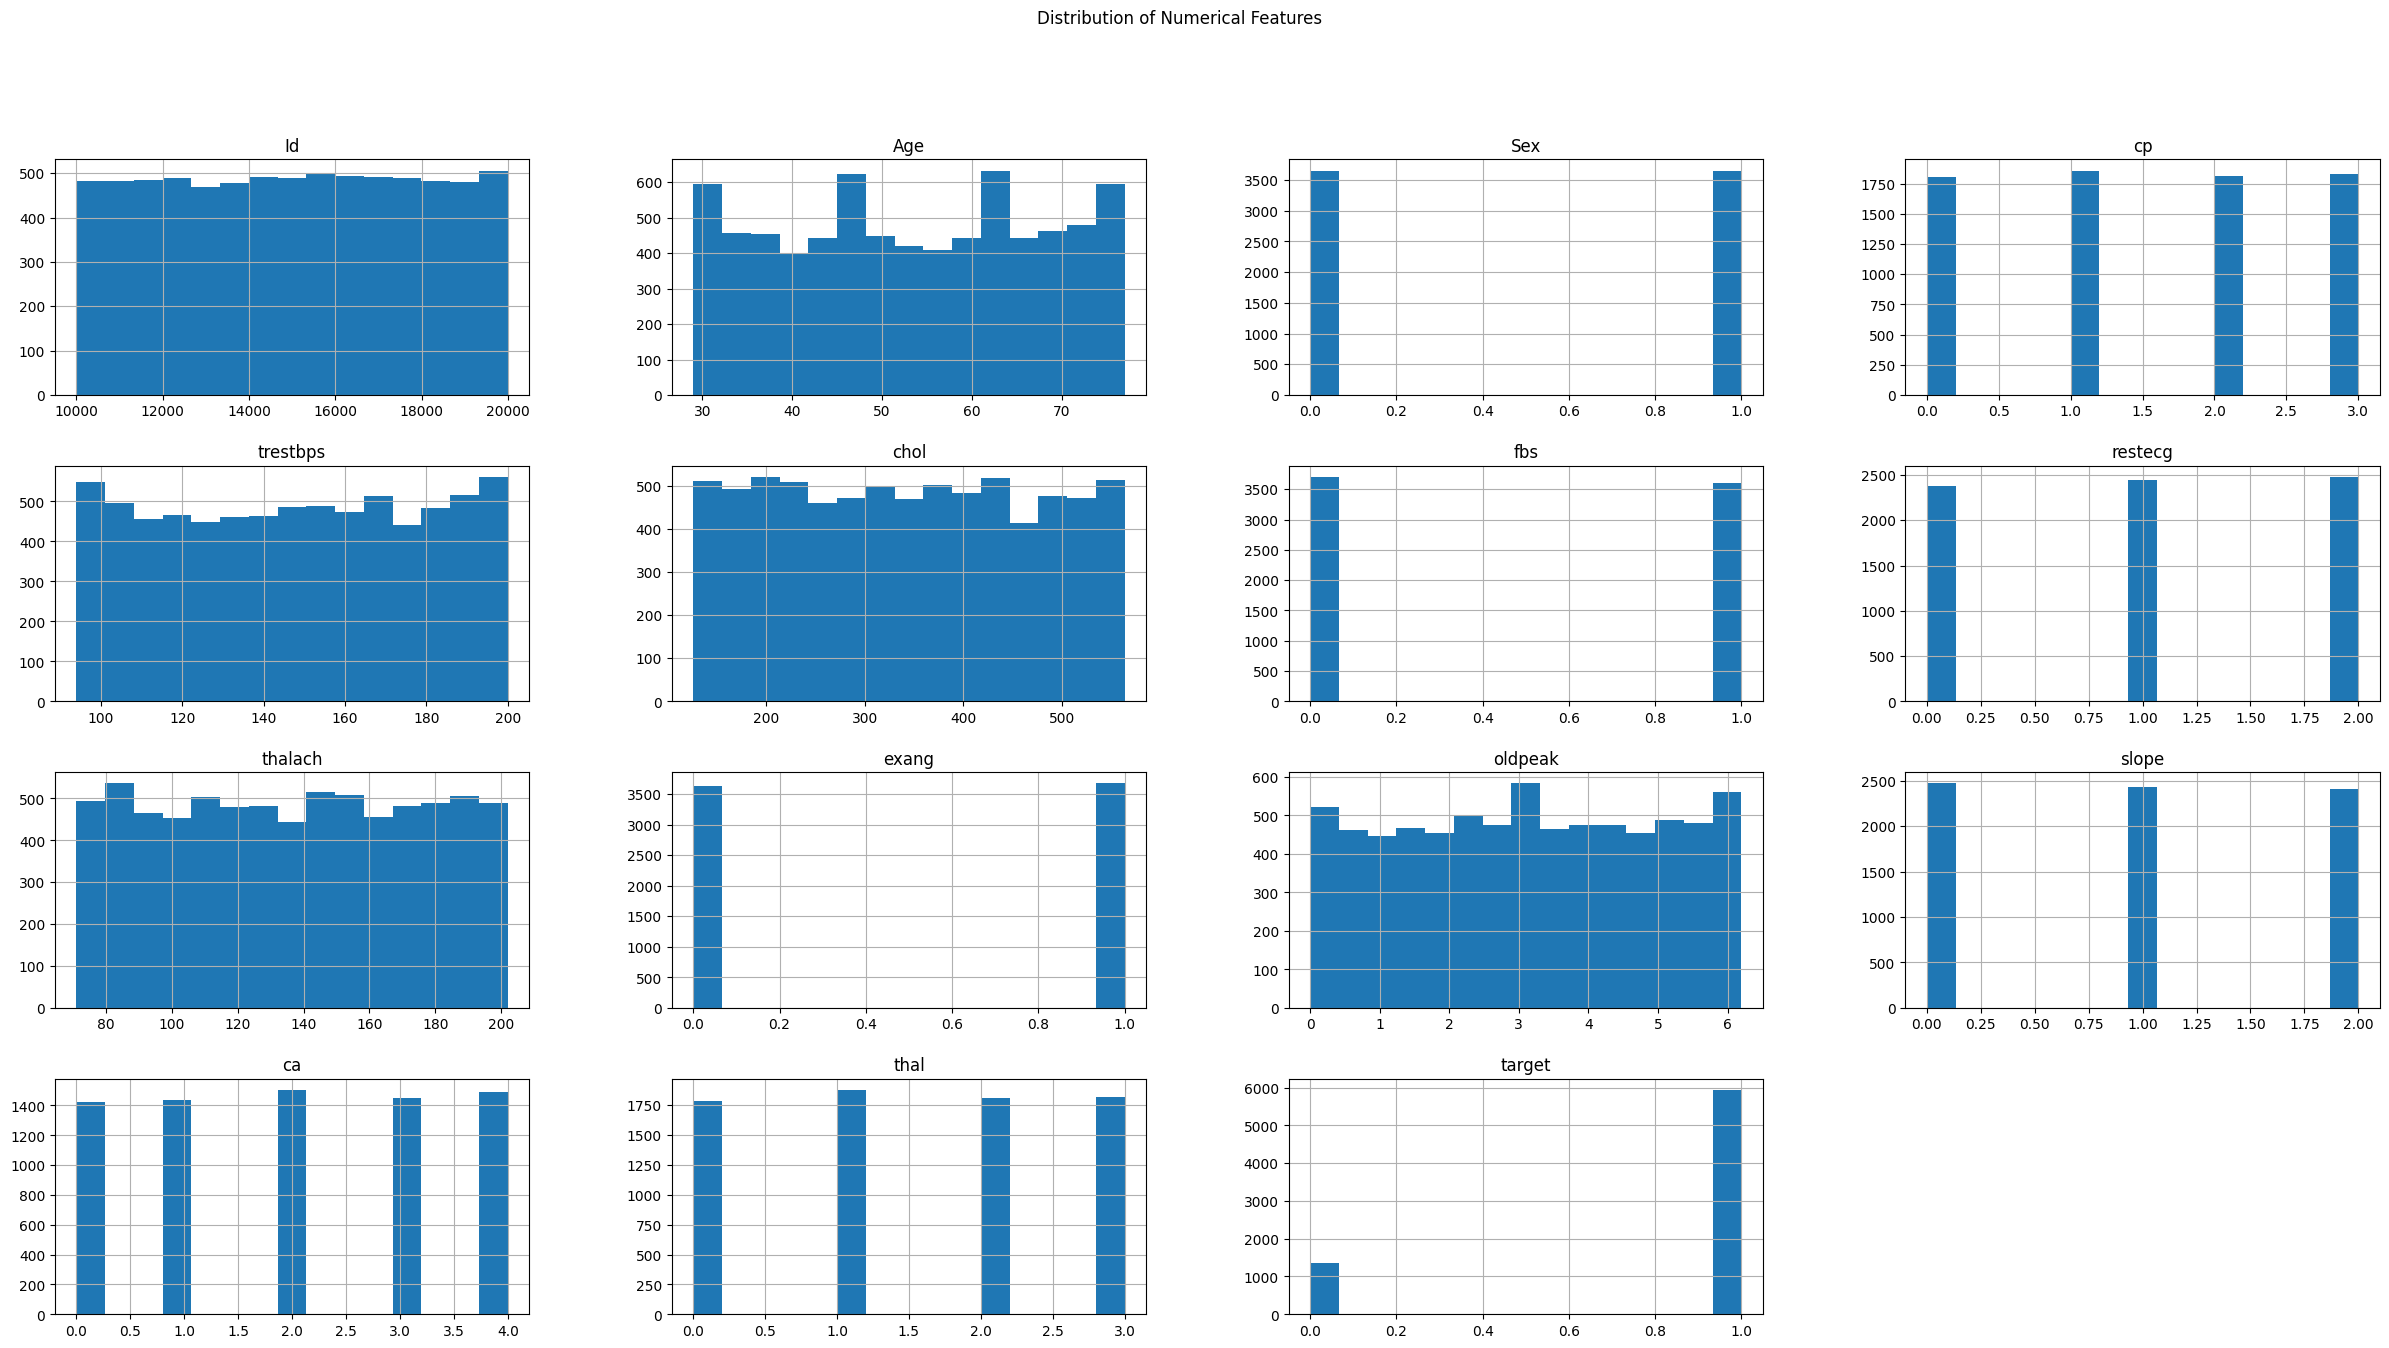

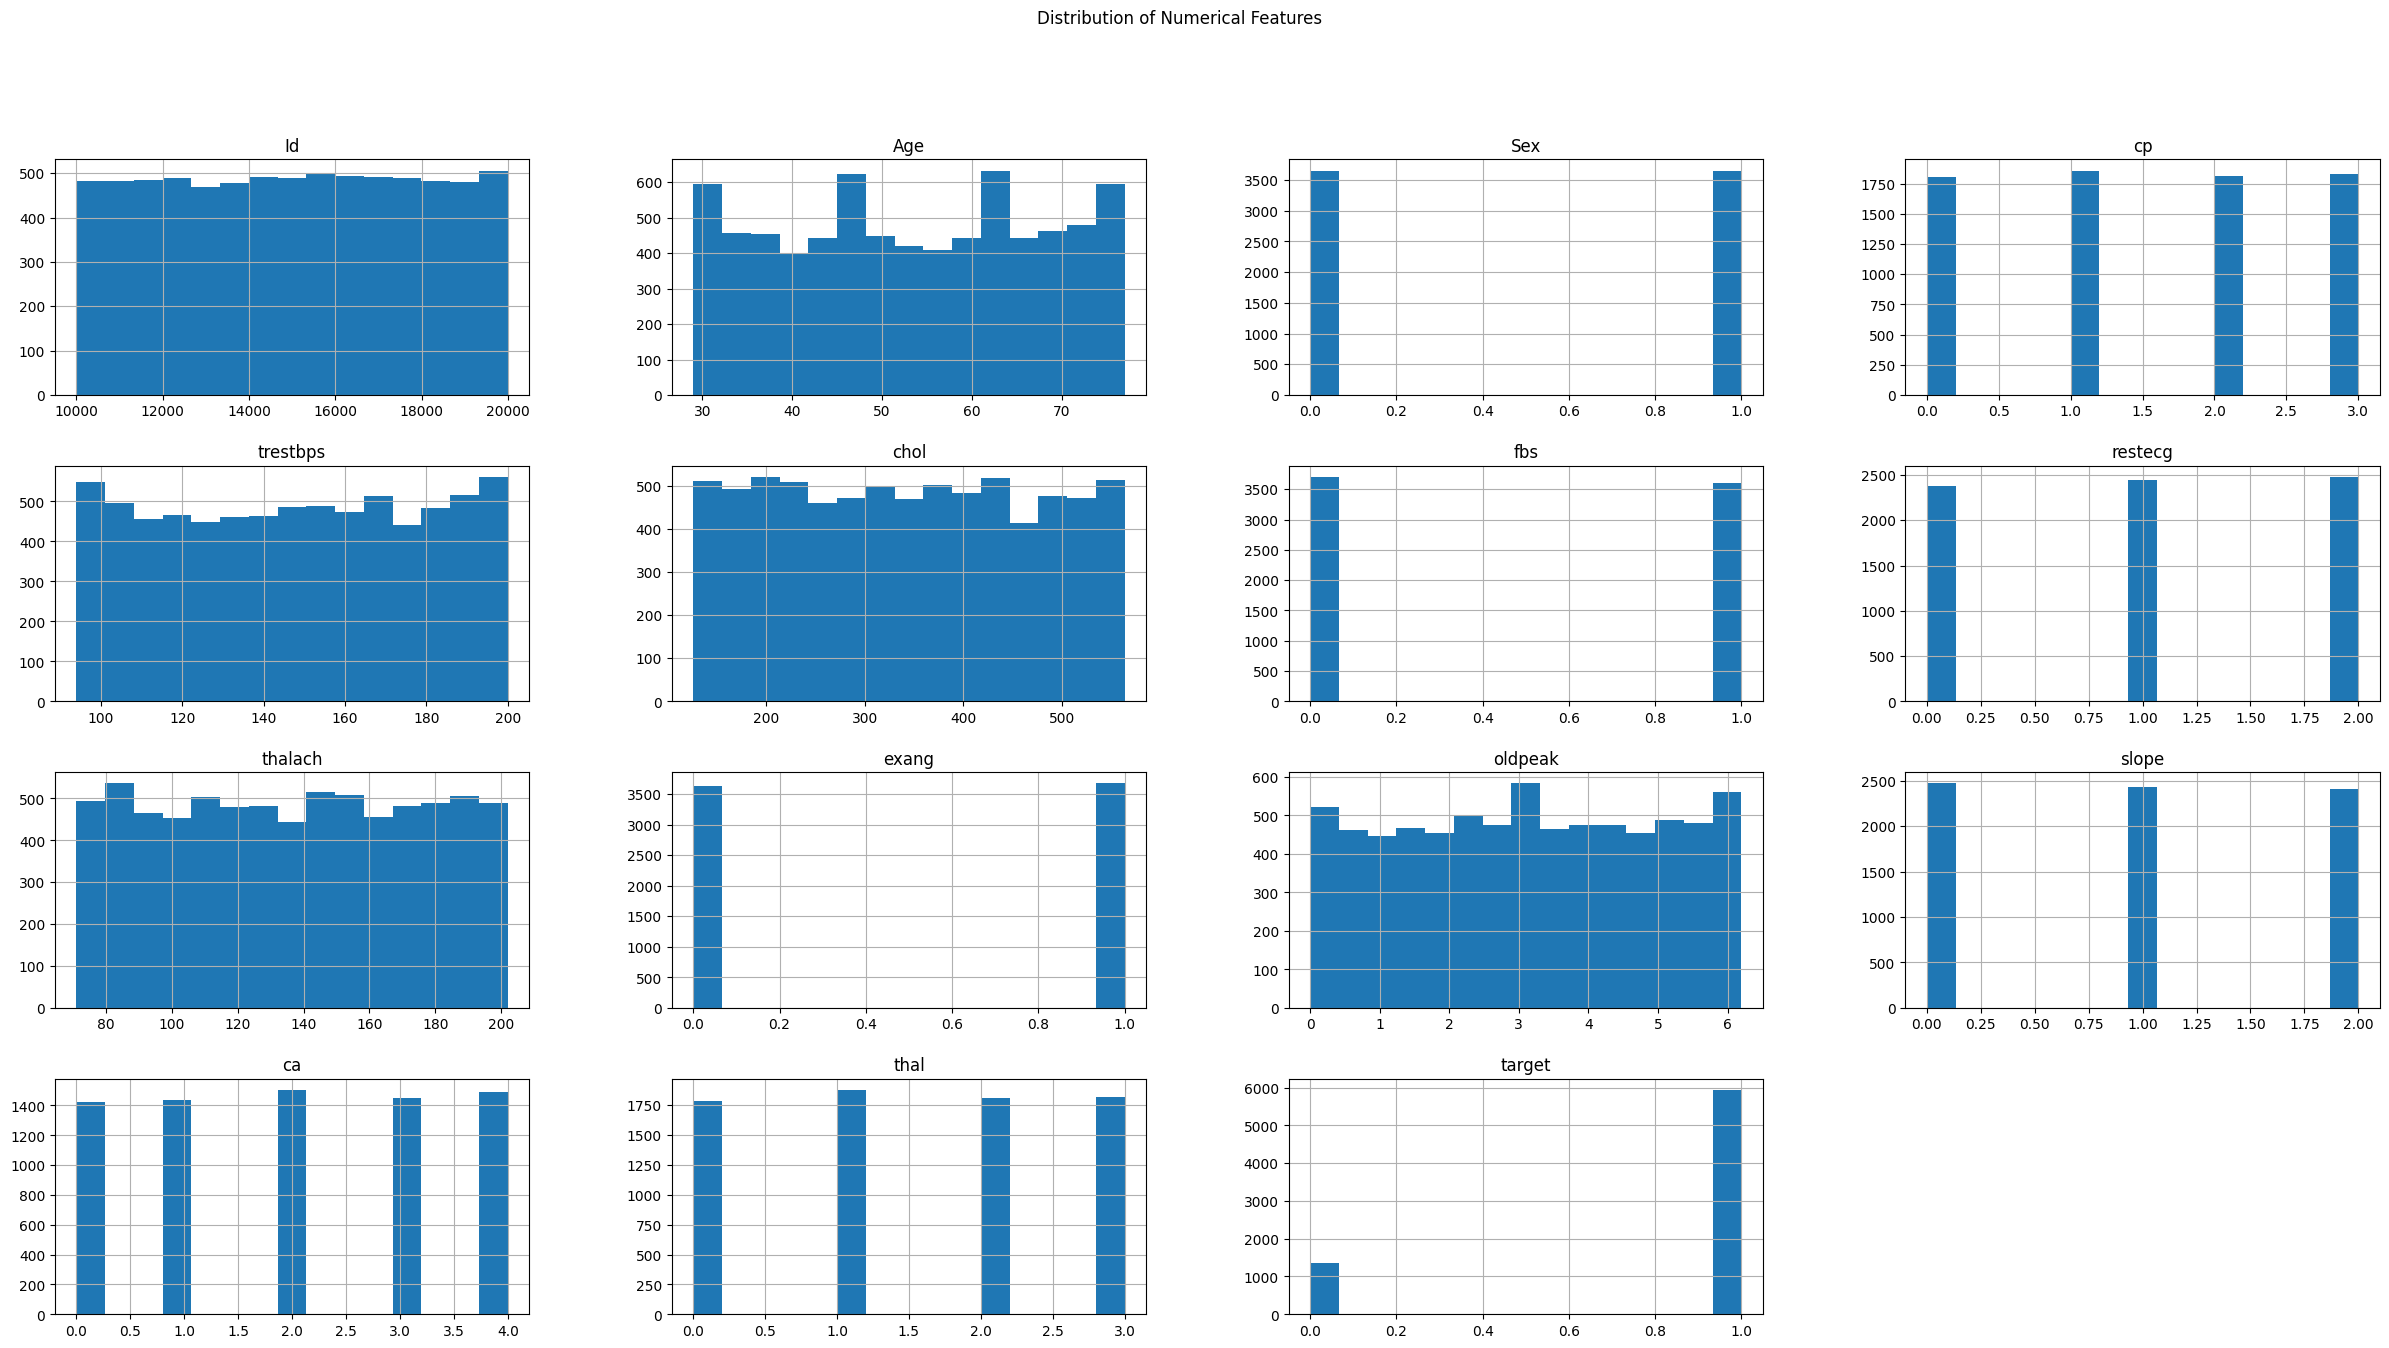

In [8]:
#  Plot histograms for numerical features

numerical_features = train.select_dtypes(include=np.number).columns

for feature in numerical_features:
  train[numerical_features].hist(figsize=(30, 15), bins=15)
  plt.suptitle('Distribution of Numerical Features')
  plt.show()

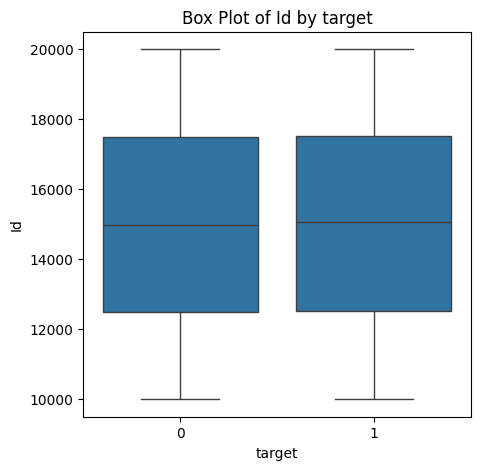

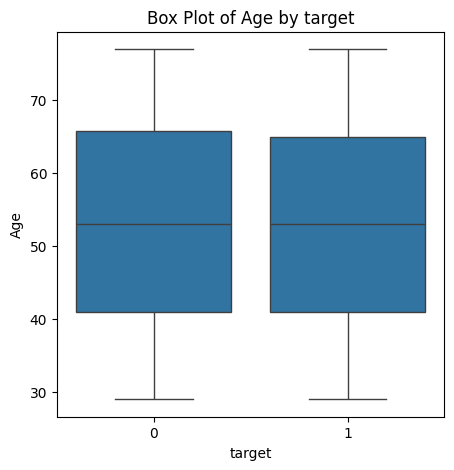

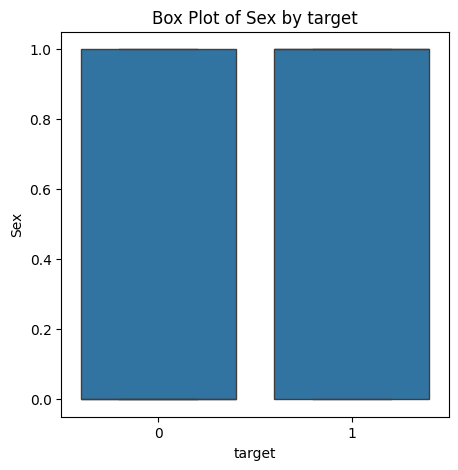

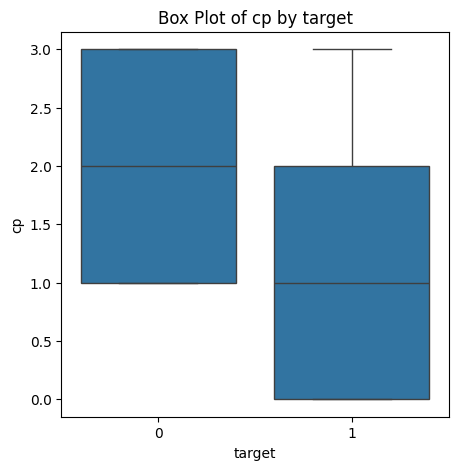

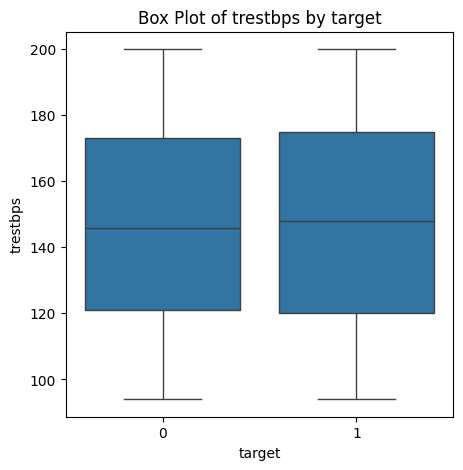

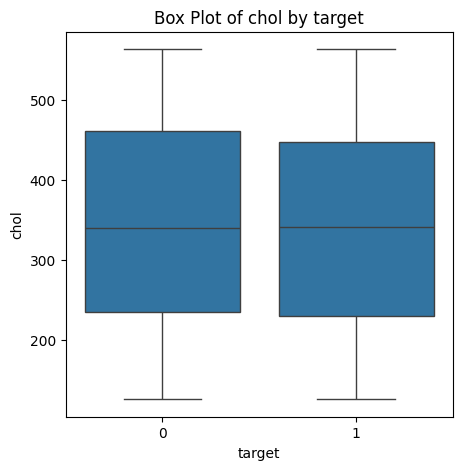

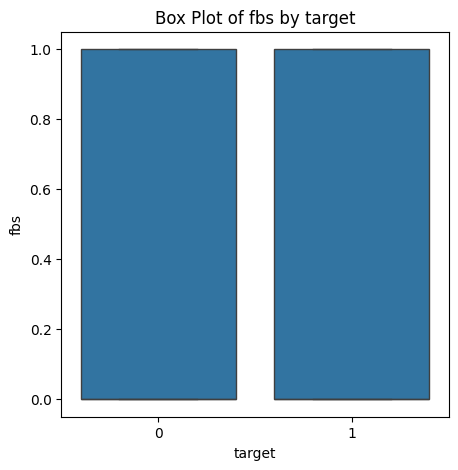

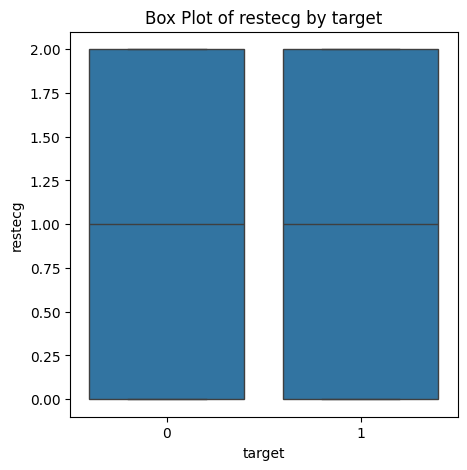

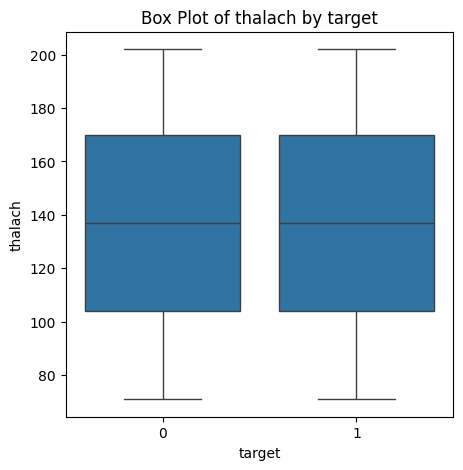

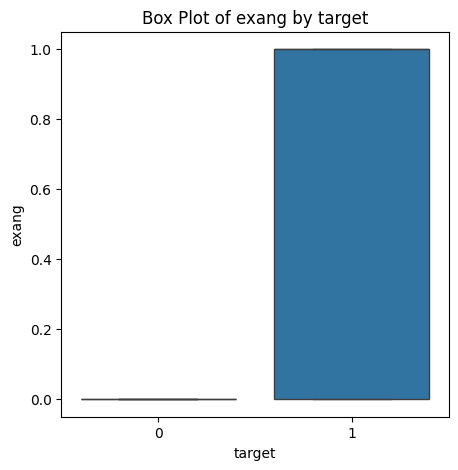

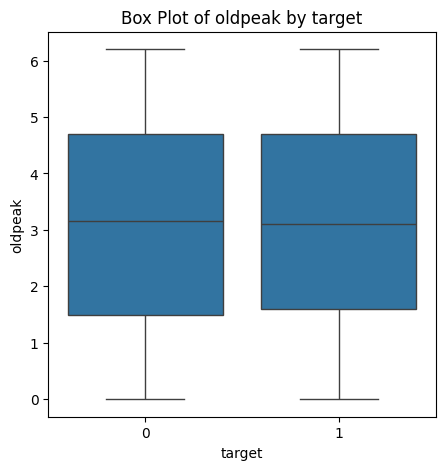

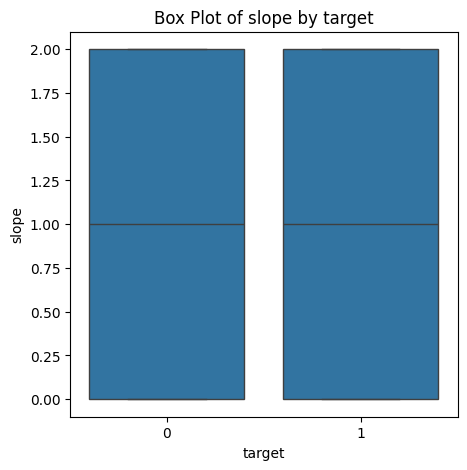

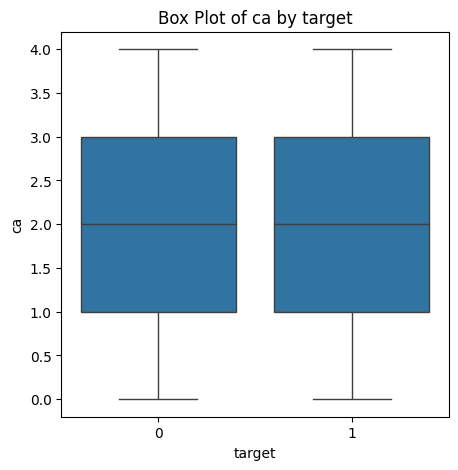

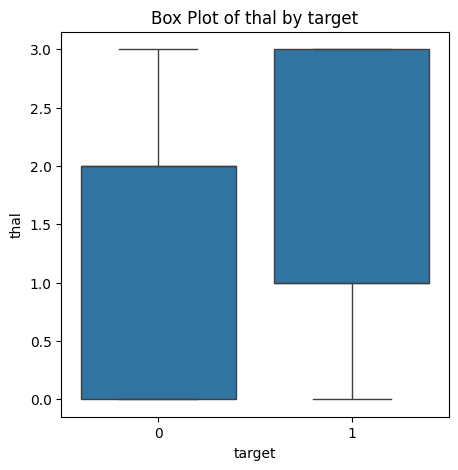

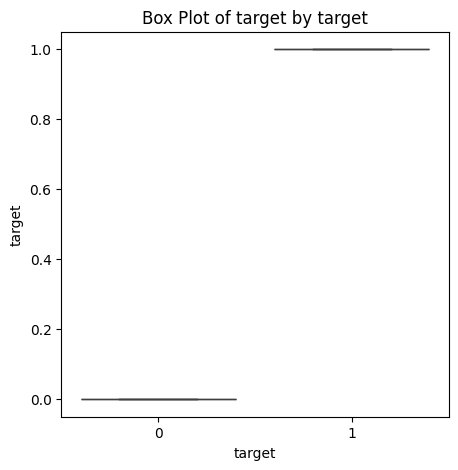

In [9]:
# Plot box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='target', y=col, data=train)
    plt.title(f'Box Plot of {col} by target')
    plt.show()

In [10]:
# Calculate the correlation of features with the target variable 'TARGET'
correlation_with_target = train.corr()['target'].sort_values(ascending=False)
correlation_with_target


,target
target,1.000000
exang,0.481897
Sex,0.030608
trestbps,0.009320
Id,0.006148
restecg,0.005911
thal,0.005709
oldpeak,0.004899
fbs,0.003925
slope,0.001909


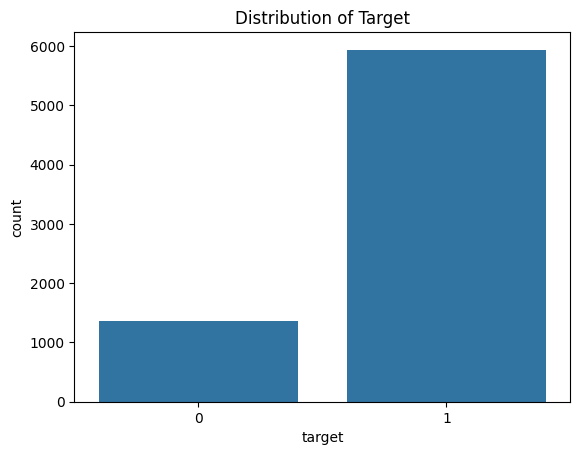

In [11]:
# Visualizing the target variable 'target'
sns.countplot(x='target', data=train)
plt.title('Distribution of Target')
plt.show()

In [12]:
# descriptive statistics of train data
train.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data Preprocessing

In [13]:
# Dropping target variable from training data
target = train['target']
train = train.drop('target', axis=1)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 798.9 KB


In [18]:
# Check for missing values
missing_values = train.isnull().sum()
missing_values

,0
Id,0
Age,0
Sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [21]:
# Check for missing values
missing_values = test.isnull().sum()
missing_values


,0
id,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [42]:
# Combine train and test data for uniform preprocessing
data = pd.concat([train, test], sort=False)
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB
None


In [36]:
# prompt:  do encoding categorical variables, and feature scaling on my dataset

In [39]:
train = pd.DataFrame(train_encoded_scaled)
test= pd.DataFrame(test_encoded_scaled)

In [40]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.396927,-1.422113,-0.999316,-0.450493,0.339337,-1.082671,1.013927,-1.241813,0.458684,-1.006457,-0.910004,0.010388,1.404493,-0.451242
1,-1.298253,-0.012173,1.000685,0.445952,1.625618,-1.483352,-0.986264,-0.015946,-0.852298,-1.006457,-1.300839,1.234027,-0.722488,-1.349666
2,-0.613528,-1.140125,1.000685,0.445952,-1.493613,-1.106241,1.013927,-1.241813,0.484904,-1.006457,-0.575002,0.010388,0.695499,-0.451242
3,1.697767,1.538762,-0.999316,-1.346938,-1.107729,-0.289166,1.013927,1.209920,-1.271812,0.993585,0.988337,-1.213250,-0.013494,0.447182
4,-1.292016,-1.281119,1.000685,0.445952,-0.271646,0.598618,1.013927,-0.015946,0.773320,0.993585,-1.245005,1.234027,1.404493,-1.349666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,1.517576,-1.633604,1.000685,0.445952,-1.300671,-1.302653,1.013927,1.209920,-0.459003,-1.006457,-0.240001,0.010388,-1.431482,-1.349666
7299,-1.585519,-0.787640,1.000685,0.445952,-1.654398,1.635675,1.013927,1.209920,-1.586448,-1.006457,-0.686669,1.234027,0.695499,0.447182
7300,-0.624616,-0.153167,1.000685,-1.346938,0.114238,-1.396931,1.013927,-1.241813,1.402591,0.993585,-1.245005,-1.213250,-1.431482,0.447182
7301,0.113473,-1.704101,-0.999316,-1.346938,1.529147,-0.438439,1.013927,1.209920,0.642221,0.993585,0.150834,0.010388,-0.722488,-1.349666


In [41]:
test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.512665,1.186277,1.000685,-1.346938,0.500122,1.195711,-0.986264,1.209920,0.878198,0.993585,-0.630836,0.010388,-1.431482,-0.451242
1,-1.586212,0.551803,1.000685,-1.346938,-0.528902,-0.823407,-0.986264,1.209920,-1.638887,0.993585,0.988337,1.234027,-0.013494,0.447182
2,-0.254185,-0.012173,1.000685,-1.346938,-1.686555,1.690670,1.013927,-0.015946,-1.665107,0.993585,-1.356672,0.010388,-0.722488,-1.349666
3,-1.598340,-1.140125,-0.999316,-0.450493,0.982478,-0.438439,-0.986264,-0.015946,1.455030,0.993585,1.435006,0.010388,-1.431482,-1.349666
4,0.799931,-1.281119,-0.999316,1.342396,-1.397142,-0.485578,-0.986264,-1.241813,-0.380344,-1.006457,-1.021671,0.010388,1.404493,1.345606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,-0.019937,-1.351616,-0.999316,1.342396,-0.368117,-0.407013,-0.986264,-0.015946,0.694661,-1.006457,-0.295835,1.234027,-0.013494,1.345606
2693,0.607266,1.327271,-0.999316,-0.450493,-1.397142,-1.389075,1.013927,1.209920,-1.088275,0.993585,-1.580007,-1.213250,-0.013494,0.447182
2694,1.338425,-1.563107,1.000685,-1.346938,0.178552,0.897164,1.013927,-0.015946,0.878198,0.993585,0.374168,-1.213250,0.695499,-0.451242
2695,-1.740067,1.256774,-0.999316,-1.346938,-1.172043,-0.791981,1.013927,-1.241813,0.275146,0.993585,1.211672,-1.213250,-0.722488,0.447182


In [43]:
# Combine train and test data for uniform preprocessing
data = pd.concat([train, test], sort=False)
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB
None


In [46]:
# Split the combined data back into train and test sets
train = data.iloc[:len(target), :]
test = data.iloc[len(target):, :]

Model Building

In [48]:
!pip install catboost # Install the catboost library if not already installed

from catboost import CatBoostClassifier # Import CatBoostClassifier after installation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [50]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, target, test_size=0.2, random_state=42)

In [51]:
# Initializing and training the CatBoostClassifier
classifier = CatBoostClassifier(loss_function='Logloss', learning_rate=0.01, use_best_model=True, eval_metric='Logloss')
classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=100)

0:	learn: 0.6750524	test: 0.6745539	best: 0.6745539 (0)	total: 54.1ms	remaining: 54s
100:	learn: 0.2774936	test: 0.2696353	best: 0.2696353 (100)	total: 1.34s	remaining: 12s
200:	learn: 0.2587314	test: 0.2572033	best: 0.2572033 (200)	total: 2.41s	remaining: 9.57s
300:	learn: 0.2488947	test: 0.2548640	best: 0.2548640 (300)	total: 3.69s	remaining: 8.58s
400:	learn: 0.2406919	test: 0.2542366	best: 0.2542366 (400)	total: 4.16s	remaining: 6.22s
500:	learn: 0.2330050	test: 0.2538217	best: 0.2537826 (495)	total: 4.73s	remaining: 4.71s
600:	learn: 0.2264469	test: 0.2536628	best: 0.2536212 (570)	total: 5.24s	remaining: 3.48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2536211941
bestIteration = 570

Shrink model to first 571 iterations.


Model Evaluation

In [52]:
Y_pred = classifier.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Classification Report:\n", classification_report(Y_val, Y_pred))

Accuracy: 0.8199863107460643
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.46      0.48       260
           1       0.88      0.90      0.89      1201

    accuracy                           0.82      1461
   macro avg       0.69      0.68      0.68      1461
weighted avg       0.81      0.82      0.82      1461



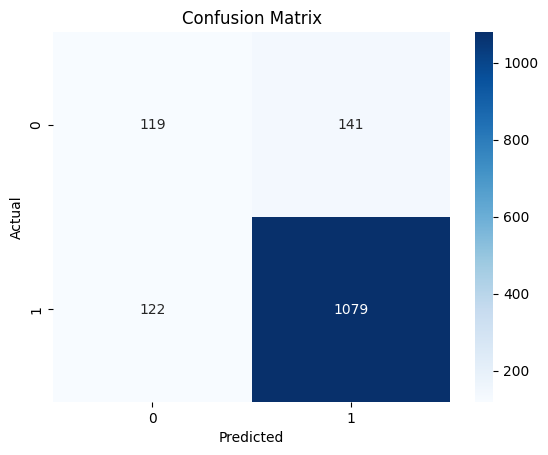

In [53]:
# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
# predictions = classifier.predict(test)[:, 1]  # Removed the indexing as predict likely returns a 1D array
predictions = classifier.predict(test)  # Now, predictions will store the 1D array directly
baseline_sub = sample_sub.copy()
baseline_sub['target'] = predictions
baseline_sub.to_csv('baseline_submission_catboost_heart.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1


In [57]:


baseline_sub.to_csv('baseline_submission_catboost_heart.csv', index=False)
